<a href="https://colab.research.google.com/github/nebuchad-nezzar/Python-Notebooks/blob/main/Toronto_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [6]:
df.head(5)

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141261609,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,9,...,Assault,Assault,069,Blake-Jones (69),069,Blake-Jones (69),-79.338139,43.675140,-8.831881e+06,5.415306e+06
1,2,GO-20141260033,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,144,Morningside Heights (144),131,Rouge (131),-79.180387,43.806289,-8.814320e+06,5.435514e+06
2,3,GO-20141260127,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,1,...,Assault Bodily Harm,Assault,084,Little Portugal (84),084,Little Portugal (84),-79.427105,43.642517,-8.841785e+06,5.410286e+06
3,4,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594,43.654946,-8.840503e+06,5.412199e+06
4,5,GO-20141260618,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,5,...,Assault,Assault,081,Trinity-Bellwoods (81),081,Trinity-Bellwoods (81),-79.416718,43.655115,-8.840629e+06,5.412225e+06


In [7]:
col = df.columns

In [8]:
col

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')

In [9]:
df.shape

(408928, 31)

In [3]:

!pip install pyspark


!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CrimeDataAnalysis").getOrCreate()

file_name = "Major_Crime_Indicators_Open_Data_-3805566126367379926.csv"

df = spark.read.csv(f'/content/{file_name}', header=True, inferSchema=True)

df.show()


+--------+---------------+-------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---------+-------+-------+----------+--------+--------+--------------------+-------------+--------+-------+-------------------+------------+--------+--------------------+--------+--------------------+-----------------+----------------+--------------------+-------------------+
|OBJECTID|EVENT_UNIQUE_ID|        REPORT_DATE|            OCC_DATE|REPORT_YEAR|REPORT_MONTH|REPORT_DAY|REPORT_DOY|REPORT_DOW|REPORT_HOUR|OCC_YEAR|OCC_MONTH|OCC_DAY|OCC_DOY|   OCC_DOW|OCC_HOUR|DIVISION|       LOCATION_TYPE|PREMISES_TYPE|UCR_CODE|UCR_EXT|            OFFENCE|MCI_CATEGORY|HOOD_158|   NEIGHBOURHOOD_158|HOOD_140|   NEIGHBOURHOOD_140|       LONG_WGS84|       LAT_WGS84|                   x|                  y|
+--------+---------------+-------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+--------

In [7]:
df.printSchema()

root
 |-- OBJECTID: string (nullable = true)
 |-- EVENT_UNIQUE_ID: string (nullable = true)
 |-- REPORT_DATE: string (nullable = true)
 |-- OCC_DATE: string (nullable = true)
 |-- REPORT_YEAR: string (nullable = true)
 |-- REPORT_MONTH: string (nullable = true)
 |-- REPORT_DAY: string (nullable = true)
 |-- REPORT_DOY: string (nullable = true)
 |-- REPORT_DOW: string (nullable = true)
 |-- REPORT_HOUR: string (nullable = true)
 |-- OCC_YEAR: string (nullable = true)
 |-- OCC_MONTH: string (nullable = true)
 |-- OCC_DAY: string (nullable = true)
 |-- OCC_DOY: string (nullable = true)
 |-- OCC_DOW: string (nullable = true)
 |-- OCC_HOUR: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- LOCATION_TYPE: string (nullable = true)
 |-- PREMISES_TYPE: string (nullable = true)
 |-- UCR_CODE: string (nullable = true)
 |-- UCR_EXT: string (nullable = true)
 |-- OFFENCE: string (nullable = true)
 |-- MCI_CATEGORY: string (nullable = true)
 |-- HOOD_158: string (nullable = true)

In [9]:

df_cleaned = df.dropDuplicates()


In [ ]:

df_cleaned.describe().show()


In [12]:
from pyspark.sql.functions import count


grouped_by_occ_year = df_cleaned.groupBy("OCC_YEAR").agg(count("*").alias("Count"))
grouped_by_occ_year.show()

grouped_by_report_year = df_cleaned.groupBy("REPORT_YEAR").agg(count("*").alias("Count"))
grouped_by_report_year.show()

grouped_by_occ_year.coalesce(1).write.csv('/content/grouped_by_occ_year.csv', header=True)
grouped_by_report_year.coalesce(1).write.csv('/content/grouped_by_report_year.csv', header=True)


+--------+-----+
|OCC_YEAR|Count|
+--------+-----+
|    July|    1|
|    2016|33665|
|    2012|  219|
|    2020|35277|
|    2019|40156|
|    2017|35560|
|February|    1|
|    2014|32501|
|    2013|  632|
|    2005|   38|
|    2000|   32|
|    NULL|  141|
| October|    1|
|    2002|   24|
|    2018|37567|
|    2009|   87|
|    2006|   26|
|    2004|   33|
|    2011|  150|
|    2022|41606|
+--------+-----+
only showing top 20 rows

+--------------------+-----+
|         REPORT_YEAR|Count|
+--------------------+-----+
|                July|    1|
|                2016|33534|
|                2020|35185|
|                2019|40124|
|                2017|35140|
|                2014|32466|
|                NULL|    3|
|             October|    1|
|                2018|37347|
|1/14/2015 5:00:00 AM|    1|
|4/28/2015 5:00:00 AM|    1|
|                2022|41761|
|                2023|49393|
|                   1|    1|
|                 289|    1|
|                2021|35151|
|              

In [216]:
from pyspark.sql.functions import year, col, lit
current_year = 2024
df_last_10_years = df_cleaned.filter(
    (col("OCC_YEAR") >= current_year - 10) & (col("OCC_YEAR") <= current_year)
)

df_last_10_years.show()

df_last_10_years.coalesce(1).write.csv('/content/last_10_years.csv', header=True)


+--------+----------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---------+-------+-------+----------+--------+--------+--------------------+-------------+--------+-------+--------------------+---------------+--------+--------------------+--------+--------------------+-----------------+----------------+-----------------+----------------+
|OBJECTID| EVENT_UNIQUE_ID|         REPORT_DATE|            OCC_DATE|REPORT_YEAR|REPORT_MONTH|REPORT_DAY|REPORT_DOY|REPORT_DOW|REPORT_HOUR|OCC_YEAR|OCC_MONTH|OCC_DAY|OCC_DOY|   OCC_DOW|OCC_HOUR|DIVISION|       LOCATION_TYPE|PREMISES_TYPE|UCR_CODE|UCR_EXT|             OFFENCE|   MCI_CATEGORY|HOOD_158|   NEIGHBOURHOOD_158|HOOD_140|   NEIGHBOURHOOD_140|       LONG_WGS84|       LAT_WGS84|                x|               y|
+--------+----------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+------

AnalysisException: [PATH_ALREADY_EXISTS] Path file:/content/last_10_years.csv already exists. Set mode as "overwrite" to overwrite the existing path.

In [14]:
current_year = 2024

selected_category = 'Assault'

df_filtered_by_category = df_cleaned.filter(
    (col("OCC_YEAR") >= current_year - 10) &
    (col("OCC_YEAR") <= current_year) &
    (col("MCI_CATEGORY") == selected_category)
)

df_filtered_by_category.show()

df_filtered_by_category.coalesce(1).write.csv('/content/filtered_by_category.csv', header=True)

+--------+---------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---------+-------+-------+----------+--------+--------+--------------------+-------------+--------+-------+--------------------+------------+--------+--------------------+--------+--------------------+-----------------+----------------+-----------------+----------------+
|OBJECTID|EVENT_UNIQUE_ID|         REPORT_DATE|            OCC_DATE|REPORT_YEAR|REPORT_MONTH|REPORT_DAY|REPORT_DOY|REPORT_DOW|REPORT_HOUR|OCC_YEAR|OCC_MONTH|OCC_DAY|OCC_DOY|   OCC_DOW|OCC_HOUR|DIVISION|       LOCATION_TYPE|PREMISES_TYPE|UCR_CODE|UCR_EXT|             OFFENCE|MCI_CATEGORY|HOOD_158|   NEIGHBOURHOOD_158|HOOD_140|   NEIGHBOURHOOD_140|       LONG_WGS84|       LAT_WGS84|                x|               y|
+--------+---------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---------+-----

In [215]:

crime_types = df_last_10_years.select("MCI_CATEGORY").distinct().rdd.flatMap(lambda x: x).collect()

print("Types of Crimes:")
for crime_type in crime_types:
    print(crime_type)

Types of Crimes:
Auto Th6/2015 5:00:00 AM
Auto Th5 5:00:00 AM
February
Assault
Kensington-Chinatown (78)
Robbery - Financial Institute
Robbery
Theft Over
-8839729.80765121
Break and Enter
Ass Road)"
2015
5413848.73576542
Auto Theft
None


In [15]:
from pyspark.sql.functions import col

current_year = 2024

selected_category = 'Assault'

df_filtered_by_category_5_years = df_cleaned.filter(
    (col("OCC_YEAR") >= current_year - 5) &
    (col("OCC_YEAR") <= current_year) &
    (col("MCI_CATEGORY") == selected_category)
)

df_filtered_by_category_5_years.show()

df_filtered_by_category_5_years.coalesce(1).write.csv('/content/filtered_by_category_5_years.csv', header=True)


+--------+---------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---------+-------+-------+----------+--------+--------+--------------------+-------------+--------+-------+--------------------+------------+--------+--------------------+--------+--------------------+-----------------+----------------+--------------------+-------------------+
|OBJECTID|EVENT_UNIQUE_ID|         REPORT_DATE|            OCC_DATE|REPORT_YEAR|REPORT_MONTH|REPORT_DAY|REPORT_DOY|REPORT_DOW|REPORT_HOUR|OCC_YEAR|OCC_MONTH|OCC_DAY|OCC_DOY|   OCC_DOW|OCC_HOUR|DIVISION|       LOCATION_TYPE|PREMISES_TYPE|UCR_CODE|UCR_EXT|             OFFENCE|MCI_CATEGORY|HOOD_158|   NEIGHBOURHOOD_158|HOOD_140|   NEIGHBOURHOOD_140|       LONG_WGS84|       LAT_WGS84|                   x|                  y|
+--------+---------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---

In [16]:
from pyspark.sql.functions import col

current_year = 2024

df_filtered_last_5_years = df_cleaned.filter(
    (col("OCC_YEAR") >= current_year - 5) &
    (col("OCC_YEAR") <= current_year)
)

df_grouped_by_category_5_years = df_filtered_last_5_years.groupBy("OCC_YEAR", "MCI_CATEGORY").count()

df_grouped_by_category_5_years.show()

df_grouped_by_category_5_years.coalesce(1).write.csv('/content/grouped_by_category_last_5_years.csv', header=True)


+--------+---------------+-----+
|OCC_YEAR|   MCI_CATEGORY|count|
+--------+---------------+-----+
|    2023|     Theft Over| 1726|
|    2021|        Assault|19146|
|    2024|        Assault|18138|
|    2021|        Robbery| 2287|
|    2022|     Theft Over| 1454|
|    2024|     Auto Theft| 7287|
|    2020|     Auto Theft| 5803|
|    2024|Break and Enter| 5112|
|    2023|        Robbery| 3138|
|    2019|        Assault|21109|
|    2020|        Robbery| 2863|
|    2023|     Auto Theft|12309|
|    2019|        Robbery| 3723|
|    2020|        Assault|18436|
|    2019|Break and Enter| 8573|
|    2020|     Theft Over| 1212|
|    2021|     Theft Over| 1090|
|    2024|     Theft Over| 1387|
|    2022|        Robbery| 2933|
|    2023|        Assault|24037|
+--------+---------------+-----+
only showing top 20 rows



In [17]:
current_year = 2024

df_last_5_years = df_cleaned.filter(
    (col("OCC_YEAR") >= current_year - 5) &
    (col("OCC_YEAR") <= current_year)
)


df_last_5_years.show()
df_last_5_years.coalesce(1).write.csv('/content/last_5_years_data.csv', header=True)

+--------+---------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---------+-------+-------+----------+--------+--------+--------------------+-------------+--------+-------+--------------------+---------------+--------+--------------------+--------+--------------------+-----------------+----------------+--------------------+-------------------+
|OBJECTID|EVENT_UNIQUE_ID|         REPORT_DATE|            OCC_DATE|REPORT_YEAR|REPORT_MONTH|REPORT_DAY|REPORT_DOY|REPORT_DOW|REPORT_HOUR|OCC_YEAR|OCC_MONTH|OCC_DAY|OCC_DOY|   OCC_DOW|OCC_HOUR|DIVISION|       LOCATION_TYPE|PREMISES_TYPE|UCR_CODE|UCR_EXT|             OFFENCE|   MCI_CATEGORY|HOOD_158|   NEIGHBOURHOOD_158|HOOD_140|   NEIGHBOURHOOD_140|       LONG_WGS84|       LAT_WGS84|                   x|                  y|
+--------+---------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+------

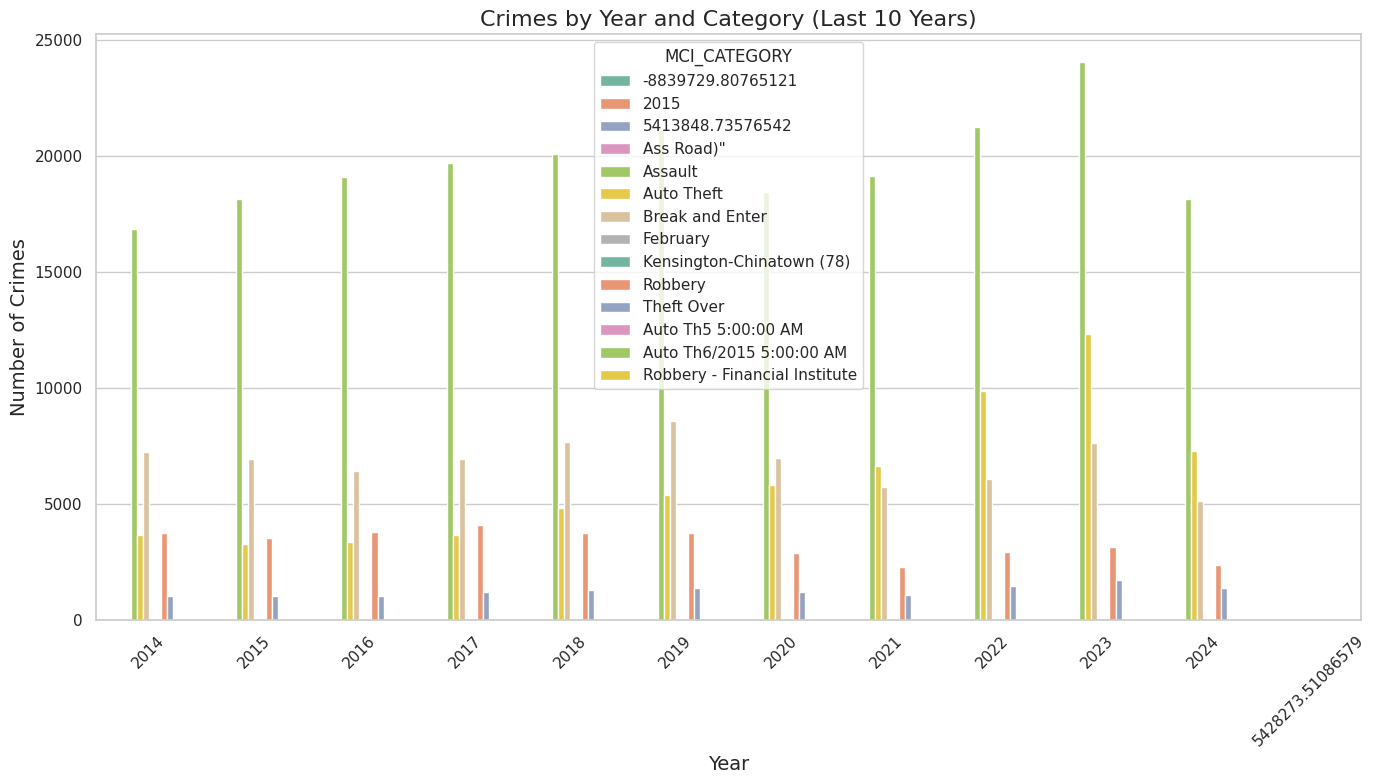

<Figure size 1400x800 with 0 Axes>

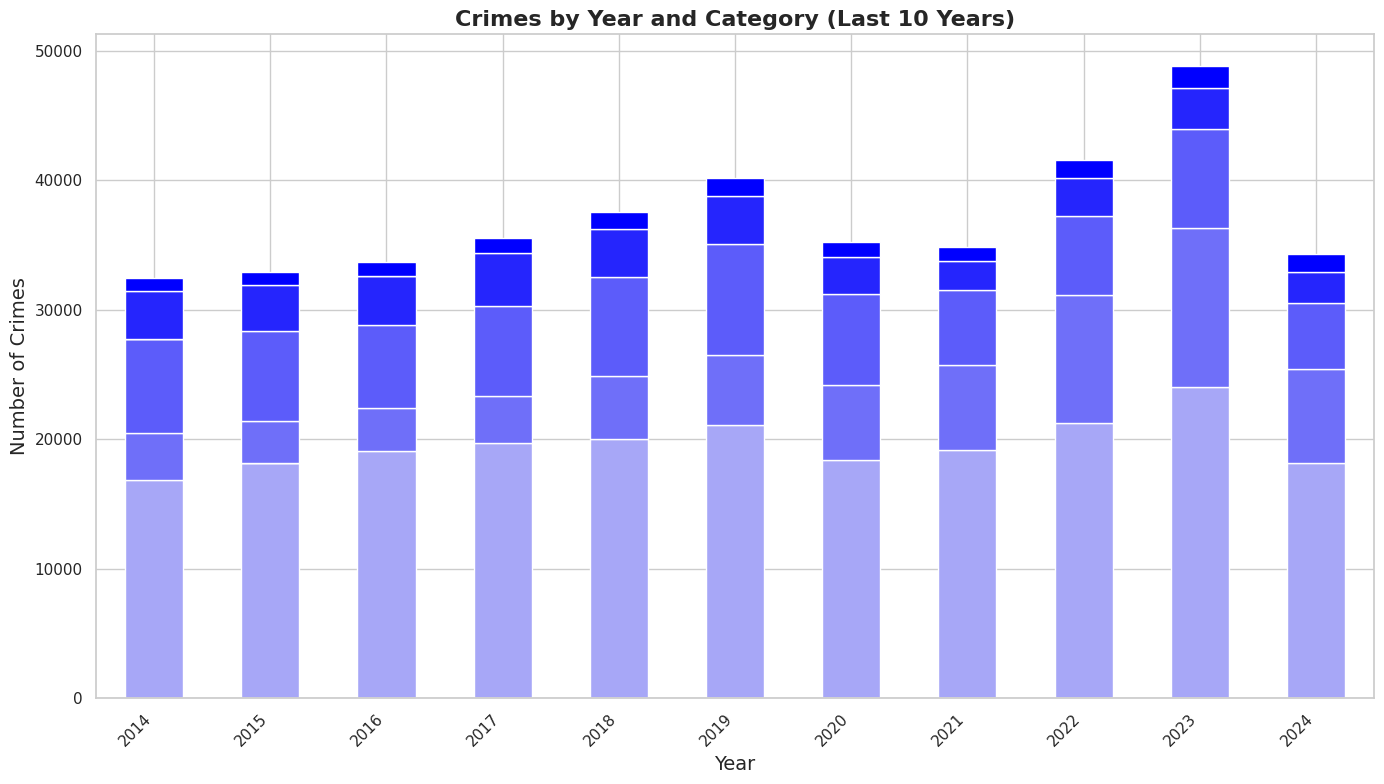

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pivoted = pandas_df_last_10_years.pivot_table(index='OCC_YEAR', columns='MCI_CATEGORY', values='count', aggfunc='sum', fill_value=0)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

colors = sns.light_palette("blue", n_colors=df_pivoted.shape[1])

ax = df_pivoted.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8))


ax.legend().set_visible(False)


plt.title('Crimes by Year and Category (Last 10 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [33]:
total_crimes_per_year = pandas_df_last_10_years.groupby('OCC_YEAR')['count'].sum().reset_index()

total_crimes_per_year = total_crimes_per_year.sort_values(by='OCC_YEAR', ascending=True)

print(total_crimes_per_year)

            OCC_YEAR  count
0               2014  32501
1               2015  32945
2               2016  33665
3               2017  35560
4               2018  37567
5               2019  40156
6               2020  35277
7               2021  34885
8               2022  41606
9               2023  48843
10              2024  34298
11  5428273.51086579      1


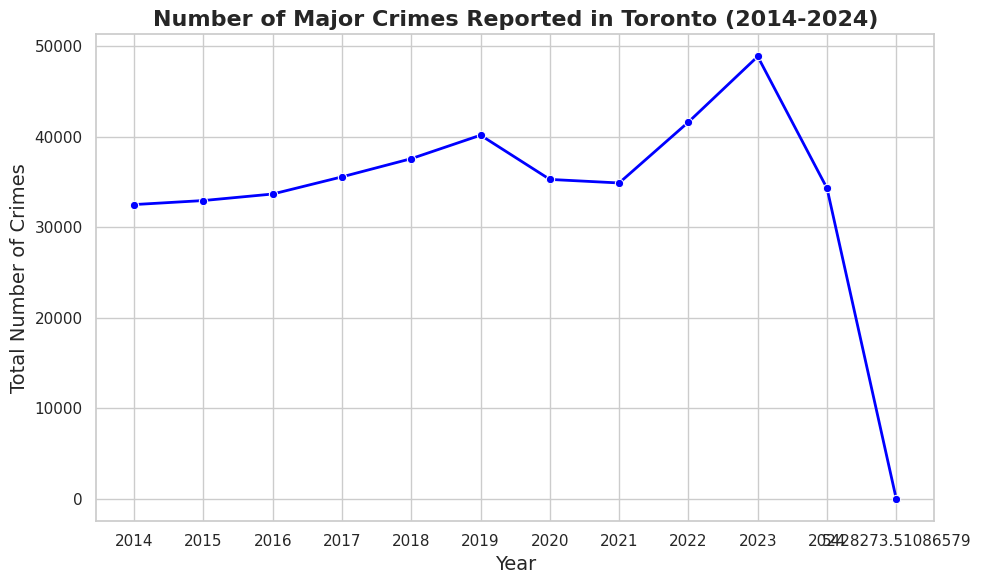

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_crimes_per_year, x='OCC_YEAR', y='count', marker='o', color='blue', linewidth=2)

plt.title('Number of Major Crimes Reported in Toronto (2014-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Crimes', fontsize=14)


plt.tight_layout()
plt.show()


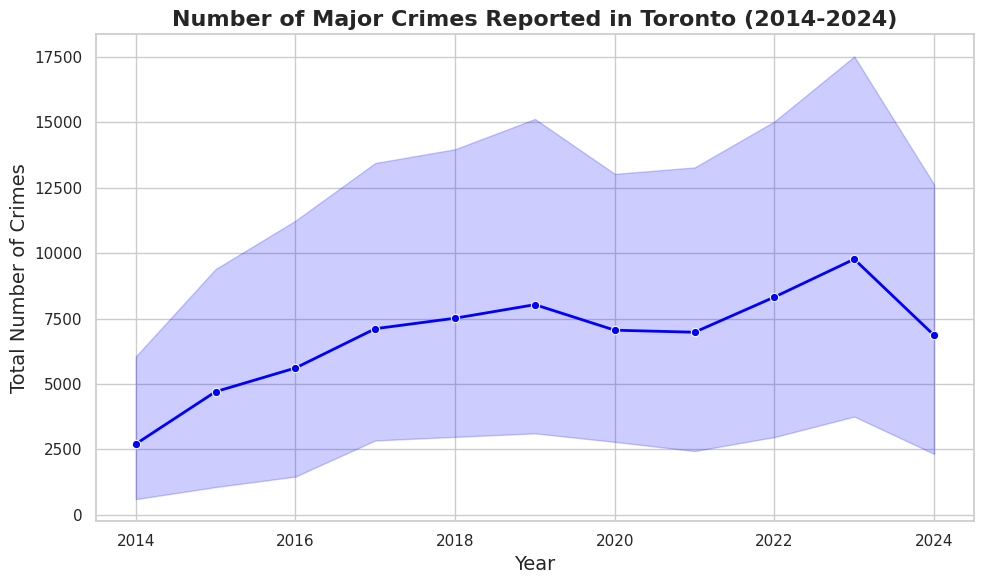

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

pandas_df_last_10_years['OCC_YEAR'] = pd.to_numeric(pandas_df_last_10_years['OCC_YEAR'])

pandas_df_last_10_years_filtered = pandas_df_last_10_years[pandas_df_last_10_years['OCC_YEAR'] <= 2024]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=pandas_df_last_10_years_filtered, x='OCC_YEAR', y='count', marker='o', color='blue', linewidth=2)


plt.title('Number of Major Crimes Reported in Toronto (2014-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Crimes', fontsize=14)


plt.tight_layout()
plt.show()


In [214]:
pandas_df_last_10_years_sorted = pandas_df_last_10_years.sort_values(by='MCI_CATEGORY')

pandas_df_last_10_years_sorted

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y,Date
213346,12342,GO-20142163494,5/27/2014 5:00:00 AM,5/27/2014 5:00:00 AM,2014,May,27,147,Tuesday,14,...,-8839729.80765121,5413848.73576542,None,None,None,None,None,None,None,None
37467,27579,GO-20143243943,11/5/2014 5:00:00 AM,11/4/2014 5:00:00 AM,2014,November,5,309,Wednesday,14,...,2015,January,14,14,Wednesday,20,2015,January,14,None
52239,27579,GO-20143243943,11/5/2014 5:00:00 AM,11/4/2014 5:00:00 AM,2014,November,5,309,Wednesday,14,...,5413848.73576542,None,None,None,None,None,None,None,None,None
204149,3088,GO-20141498594,2/9/2014 5:00:00 AM,2/8/2014 5:00:00 AM,2014,February,9,40,Sunday,15,...,"Ass Road)""",Outside,1430,100,Assault,Assault,088,High Park North (88),088,None
150053,317025,GO-20222149946,11/8/2022 5:00:00 AM,11/2/2022 5:00:00 AM,2022,November,8,312,Tuesday,15,...,Assault,111,Rockcliffe-Smythe (111),111,Rockcliffe-Smythe (111),-79.4977111898968,43.6810679017764,-8849644.72890152,5416218.63330787,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156438,196925,GO-20191605577,8/23/2019 5:00:00 AM,7/9/2019 5:00:00 AM,2019,August,23,235,Friday,8,...,Theft Over,001,West Humber-Clairville (1),001,West Humber-Clairville (1),-79.5624628361259,43.7025556667558,-8856852.84916227,5419526.77878333,None
263268,20084,GO-20142739127,8/20/2014 5:00:00 AM,5/24/2014 5:00:00 AM,2014,August,20,232,Wednesday,12,...,Theft Over,056,Leaside-Bennington (56),056,Leaside-Bennington (56),-79.3647822992146,43.7135871579345,-8834847.15244369,5421225.59085898,None
142355,202488,GO-20191963848,10/11/2019 5:00:00 AM,10/10/2019 5:00:00 AM,2019,October,11,284,Friday,11,...,Theft Over,170,Yonge-Bay Corridor (170),076,Bay Street Corridor (76),-79.3824117428642,43.6517566908603,-8836809.65317274,5411707.94025203,None
213348,30580,GO-20143447845,12/8/2014 5:00:00 AM,12/8/2014 5:00:00 AM,2014,December,8,342,Monday,14,...,None,None,None,None,None,None,None,None,None,None


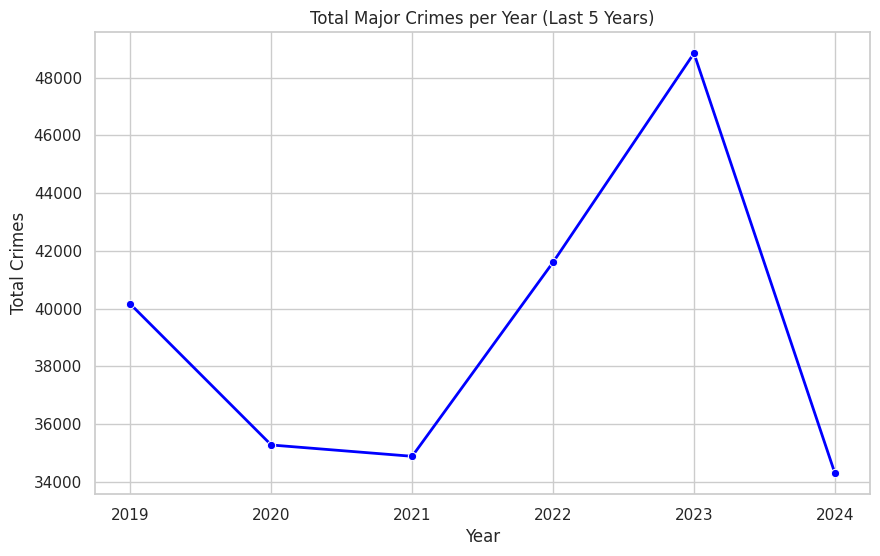

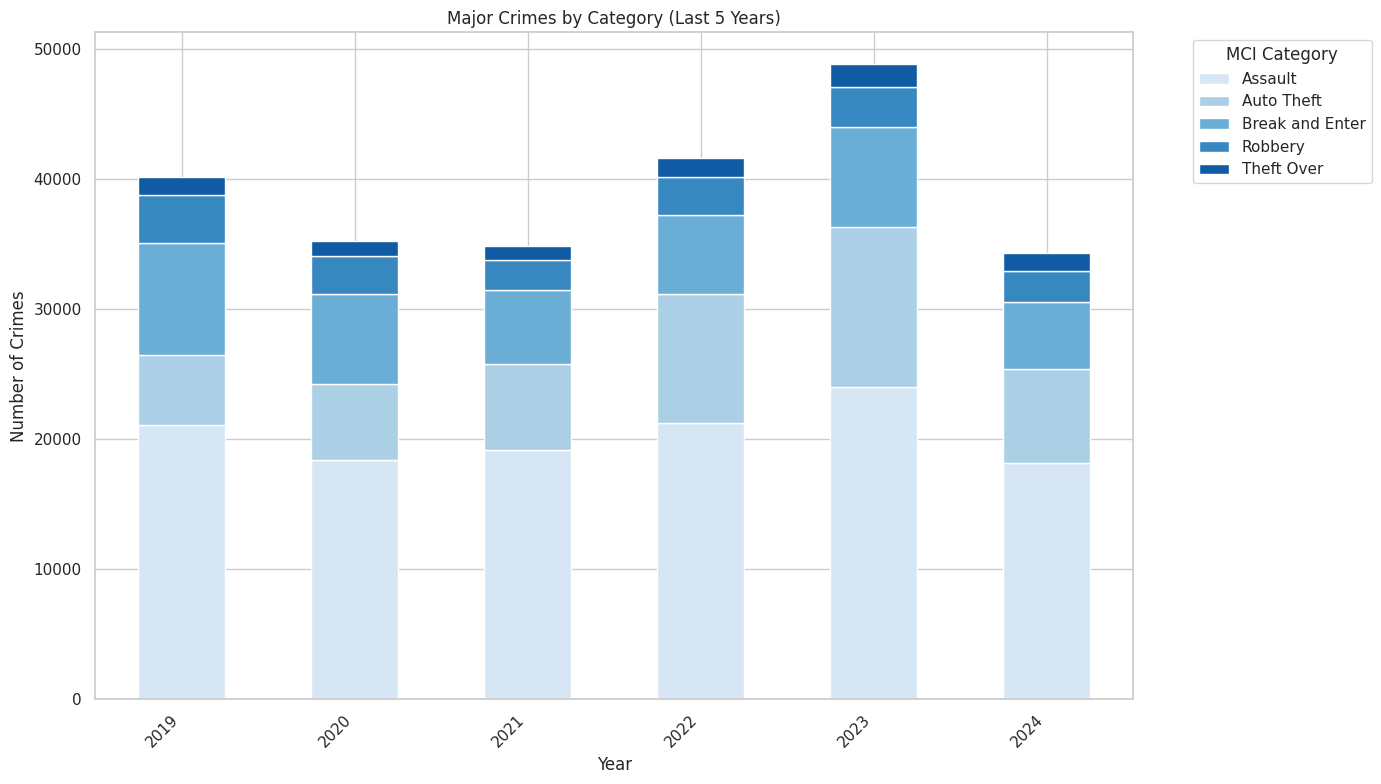

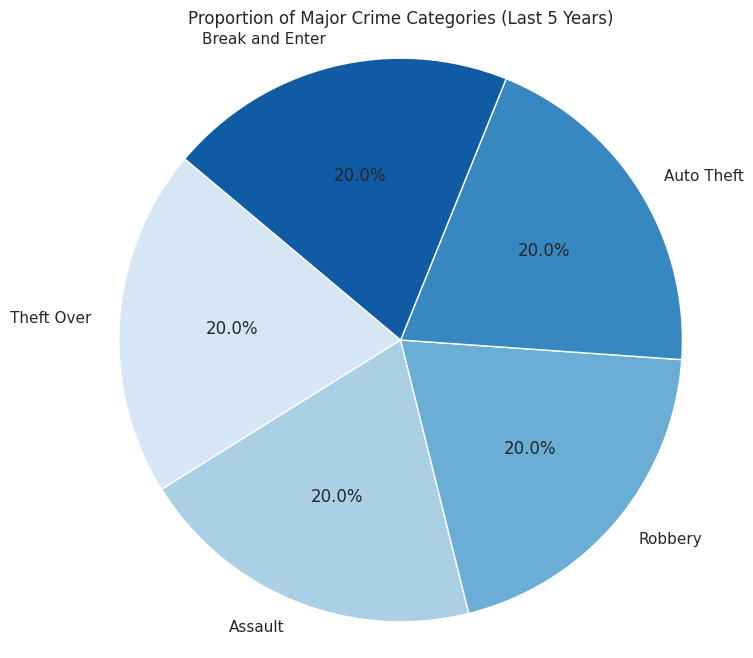

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col

spark = SparkSession.builder.appName("CrimeDataAnalysis").getOrCreate()


file_name = "Major_Crime_Indicators_Open_Data_-3805566126367379926.csv"
df = spark.read.csv(f'/content/{file_name}', header=True, inferSchema=True)

df_cleaned = df.dropDuplicates()

current_year = 2024

df_last_5_years = df_cleaned.filter(
    (col("OCC_YEAR") >= current_year - 5) & (col("OCC_YEAR") <= current_year)
)

df_grouped_by_category_5_years = df_last_5_years.groupBy("OCC_YEAR", "MCI_CATEGORY").count()
pandas_df_last_5_years = df_grouped_by_category_5_years.toPandas()

total_crimes_per_year = pandas_df_last_5_years.groupby('OCC_YEAR')['count'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_crimes_per_year, x='OCC_YEAR', y='count', marker='o', color='blue', linewidth=2)
plt.title('Total Major Crimes per Year (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()


df_pivoted = pandas_df_last_5_years.pivot_table(index='OCC_YEAR', columns='MCI_CATEGORY', values='count', aggfunc='sum', fill_value=0)
colors = sns.color_palette("Blues", len(df_pivoted.columns))
df_pivoted.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8))
plt.title('Major Crimes by Category (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='MCI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


crime_category_counts = pandas_df_last_5_years['MCI_CATEGORY'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(crime_category_counts, labels=crime_category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(crime_category_counts)))
plt.title('Proportion of Major Crime Categories (Last 5 Years)')
plt.axis('equal')
plt.show()

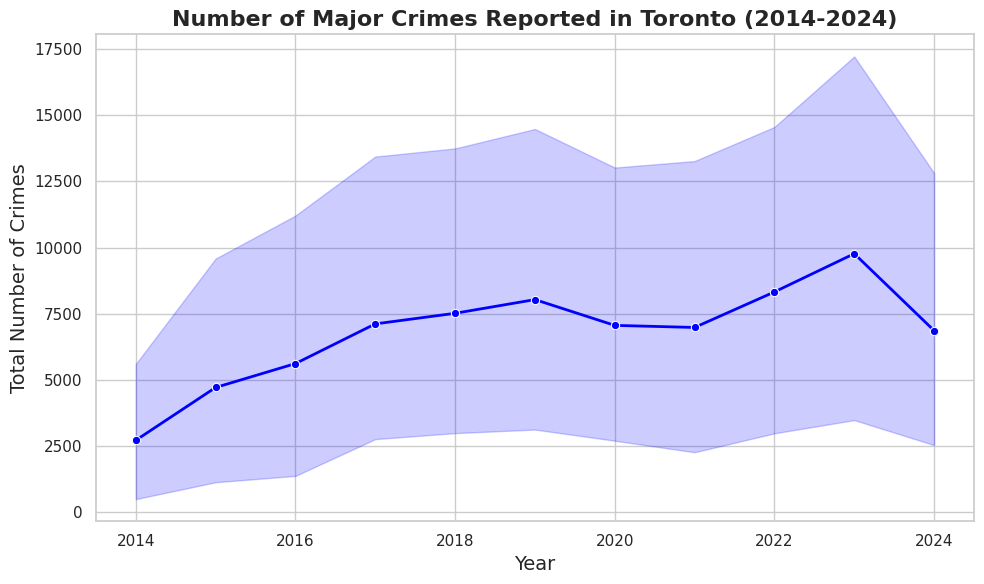

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

pandas_df_last_10_years_filtered = pandas_df_last_10_years[pandas_df_last_10_years['OCC_YEAR'] <= 2024]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=pandas_df_last_10_years_filtered, x='OCC_YEAR', y='count', marker='o', color='blue', linewidth=2)

plt.title('Number of Major Crimes Reported in Toronto (2014-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Crimes', fontsize=14)

plt.tight_layout()
plt.show()


<ipython-input-76-206f0ecf9d0c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="crime_count", y="OFFENCE", data=crime_proportions_pd, palette="Blues_d")


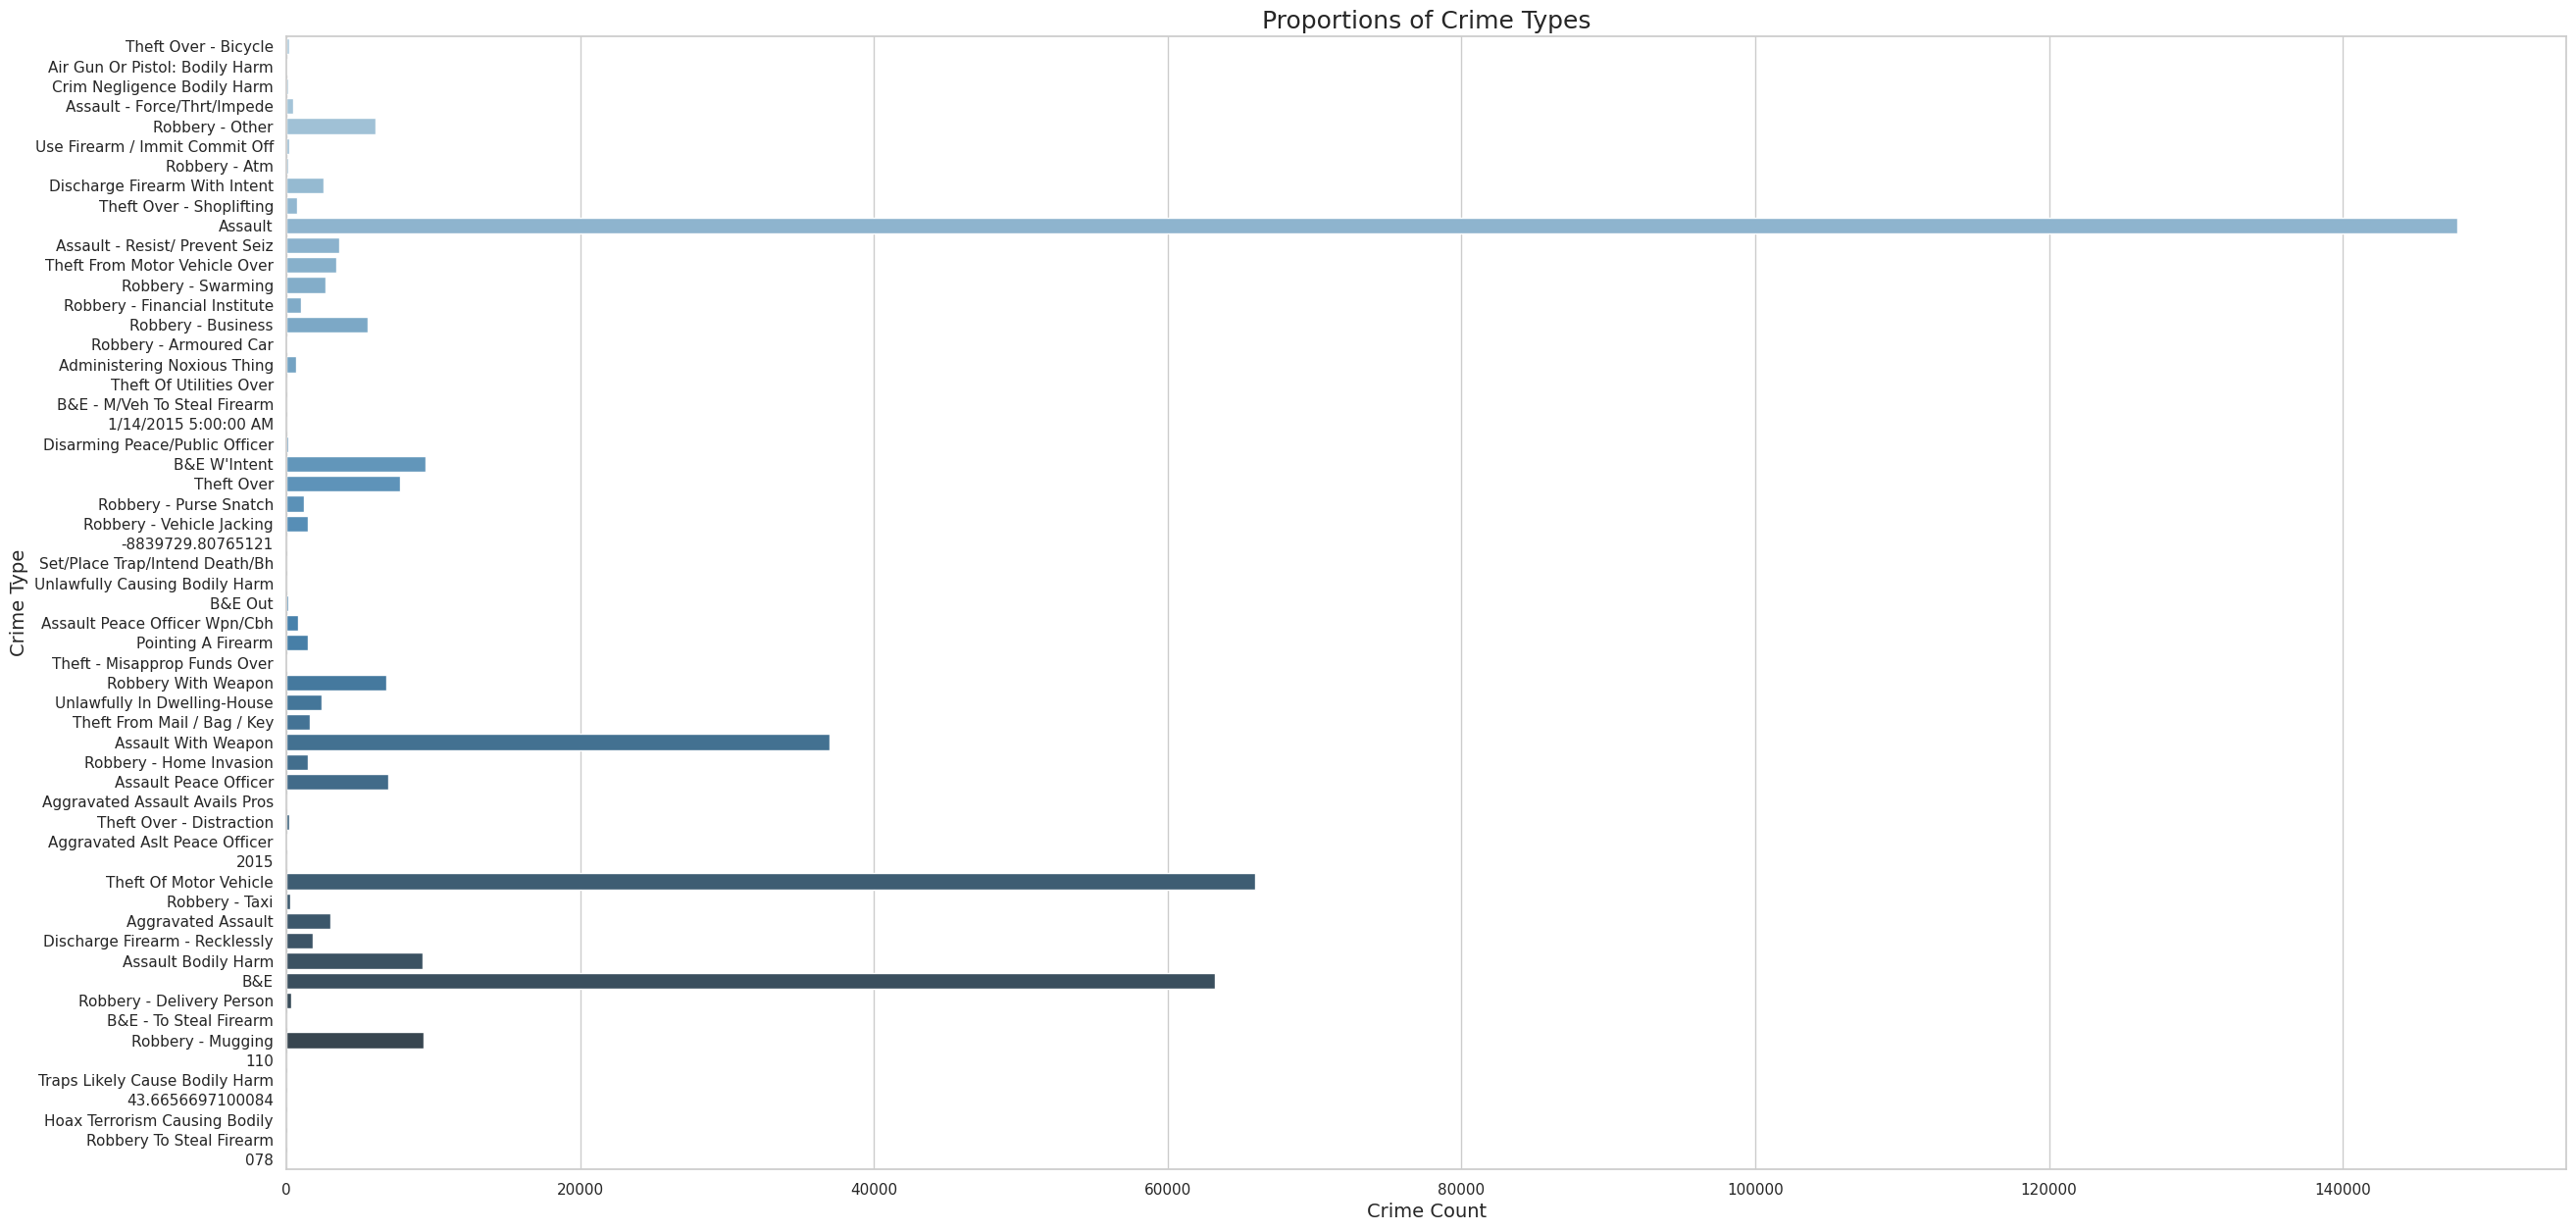

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

crime_proportions = df_last_10_years.groupBy("OFFENCE").agg(count("OBJECTID").alias("crime_count"))

crime_proportions_pd = crime_proportions.toPandas()

plt.figure(figsize=(30, 15))
sns.barplot(x="crime_count", y="OFFENCE", data=crime_proportions_pd, palette="Blues_d")

plt.xlabel('Crime Count', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)
plt.title('Proportions of Crime Types', fontsize=18)

plt.show()


In [88]:
top_5_crimes = crime_proportions_pd.sort_values(by='crime_count', ascending=False).head(5)
top_5_crimes

,OFFENCE,crime_count
9,Assault,147829
42,Theft Of Motor Vehicle,65981
47,B&E,63217
35,Assault With Weapon,36996
21,B&E W'Intent,9472


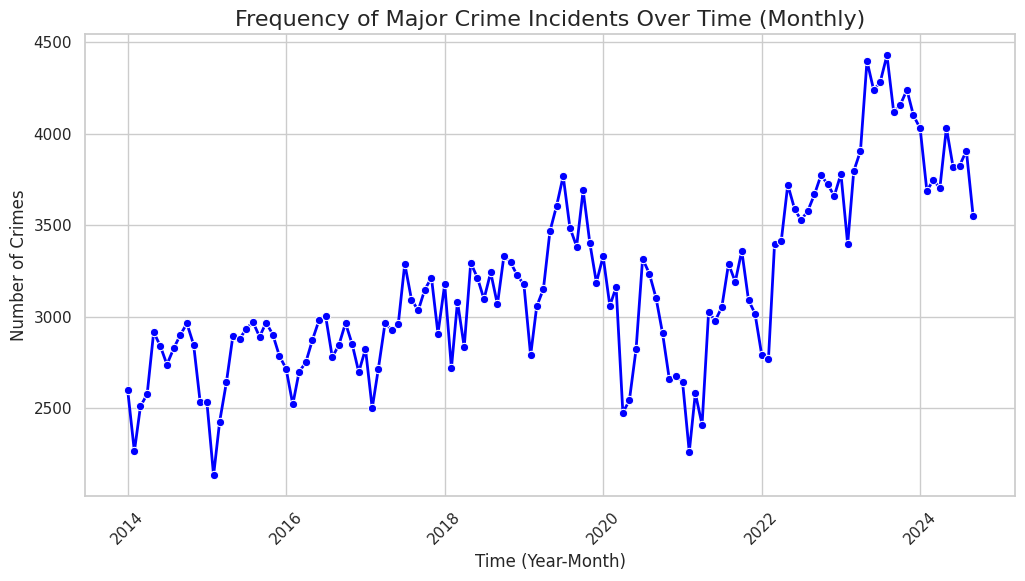

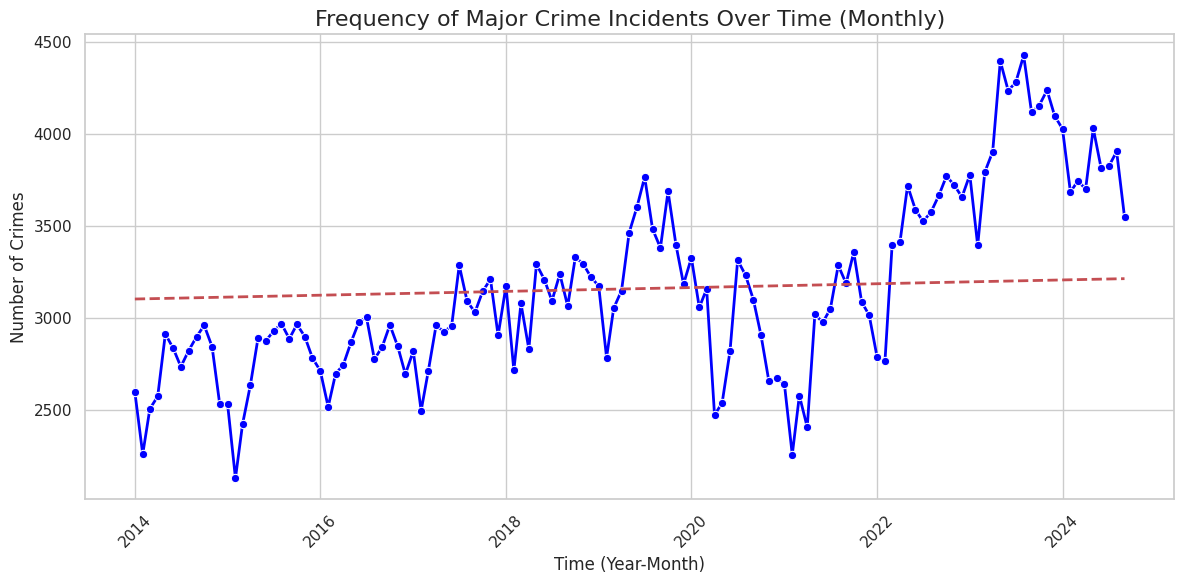

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

crime_by_month = df_last_10_years.groupBy("OCC_YEAR", "OCC_MONTH").agg(count("OBJECTID").alias("crime_count"))

crime_by_month_pd = crime_by_month.toPandas()

crime_by_month_pd['OCC_YEAR'] = pd.to_numeric(crime_by_month_pd['OCC_YEAR'], errors='coerce').astype(int)
crime_by_month_pd['OCC_MONTH'] = crime_by_month_pd['OCC_MONTH'].astype(str)

month_map = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09', 'October': '10', 'November': '11', 'December': '12'
}


crime_by_month_pd['OCC_MONTH'] = crime_by_month_pd['OCC_MONTH'].map(month_map)

crime_by_month_pd['Date'] = pd.to_datetime(crime_by_month_pd['OCC_YEAR'].astype(str) + '-' + crime_by_month_pd['OCC_MONTH'], format='%Y-%m')


crime_by_month_pd = crime_by_month_pd.sort_values('Date')
s
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_by_month_pd, x='Date', y='crime_count', marker='o', color='blue', linewidth=2)
plt.title('Frequency of Major Crime Incidents Over Time (Monthly)', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt


plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_by_month_pd, x='Date', y='crime_count', marker='o', color='blue', linewidth=2)

x = crime_by_month_pd['Date'].astype(np.int64) // 10**9
y = crime_by_month_pd['crime_count']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(crime_by_month_pd['Date'], p(x), "r--", linewidth=2)

plt.title('Frequency of Major Crime Incidents Over Time (Monthly)', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType


df_last_10_years = df_last_10_years.withColumn(
    'Date',
    F.concat_ws('-', df_last_10_years['OCC_YEAR'], df_last_10_years['OCC_MONTH'])
)

df_last_10_years = df_last_10_years.withColumn(
    'Date', F.to_date(df_last_10_years['Date'], 'yyyy-MM')
)
crime_month_each = df_last_10_years.groupBy('Date', 'OFFENCE').agg(
    F.count('OBJECTID').alias('crime_count')
)

crime_month_each = crime_month_each.orderBy('Date')
crime_month_each.show(10)


+----+--------------------+-----------+
|Date|             OFFENCE|crime_count|
+----+--------------------+-----------+
|NULL|Theft Over - Bicycle|        199|
|NULL|Air Gun Or Pistol...|         32|
|NULL|Crim Negligence B...|        138|
|NULL|Assault - Force/T...|        455|
|NULL|     Robbery - Other|       6048|
|NULL|Use Firearm / Imm...|        223|
|NULL|       Robbery - Atm|        121|
|NULL|Discharge Firearm...|       2511|
|NULL|Theft Over - Shop...|        695|
|NULL|             Assault|     147829|
+----+--------------------+-----------+
only showing top 10 rows



In [97]:
import pyspark.sql.functions as F

df_last_10_years = df_last_10_years.withColumn(
    'Date',
    F.to_date(
        F.concat(
            F.col('OCC_YEAR').cast("string"),
            F.lit('-'),
            F.col('OCC_MONTH').cast("string")
        ),
        'yyyy-MM'
    )
)

crime_month_each = df_last_10_years.groupBy(['Date', 'OFFENCE']).agg(
    F.count('OBJECTID').alias('crime_count')
)

crime_month_each = crime_month_each.orderBy('Date')

crime_month_each.show(10)


+----+--------------------+-----------+
|Date|             OFFENCE|crime_count|
+----+--------------------+-----------+
|NULL|Theft Over - Bicycle|        199|
|NULL|Air Gun Or Pistol...|         32|
|NULL|Crim Negligence B...|        138|
|NULL|Assault - Force/T...|        455|
|NULL|     Robbery - Other|       6048|
|NULL|Use Firearm / Imm...|        223|
|NULL|       Robbery - Atm|        121|
|NULL|Discharge Firearm...|       2511|
|NULL|Theft Over - Shop...|        695|
|NULL|             Assault|     147829|
+----+--------------------+-----------+
only showing top 10 rows



In [213]:
df_last_10_years = df_last_10_years.withColumn(
    "Date",
    F.to_date(F.concat(F.col("OCC_YEAR").cast("string"), F.lit("-"), F.col("OCC_MONTH").cast("string")), "yyyy-MM")
)


crime_month_offence = df_last_10_years.groupBy("Date", "OFFENCE").agg(
    F.count("OBJECTID").alias("crime_count")
)
crime_month_offence = crime_month_offence.orderBy("Date")

crime_month_offence.show()
crime_month_offence_pd = crime_month_offence.toPandas()


+----+--------------------+-----------+
|Date|             OFFENCE|crime_count|
+----+--------------------+-----------+
|NULL|Theft Over - Bicycle|        199|
|NULL|Air Gun Or Pistol...|         32|
|NULL|Crim Negligence B...|        138|
|NULL|Assault - Force/T...|        455|
|NULL|     Robbery - Other|       6048|
|NULL|Use Firearm / Imm...|        223|
|NULL|       Robbery - Atm|        121|
|NULL|Discharge Firearm...|       2511|
|NULL|Theft Over - Shop...|        695|
|NULL|             Assault|     147829|
|NULL|Assault - Resist/...|       3617|
|NULL|Theft From Motor ...|       3406|
|NULL|  Robbery - Swarming|       2657|
|NULL|Robbery - Financi...|       1019|
|NULL|  Robbery - Business|       5508|
|NULL|Robbery - Armoure...|         52|
|NULL|Administering Nox...|        682|
|NULL|Theft Of Utilitie...|          8|
|NULL|B&E - M/Veh To St...|         13|
|NULL|1/14/2015 5:00:00 AM|          1|
+----+--------------------+-----------+
only showing top 20 rows



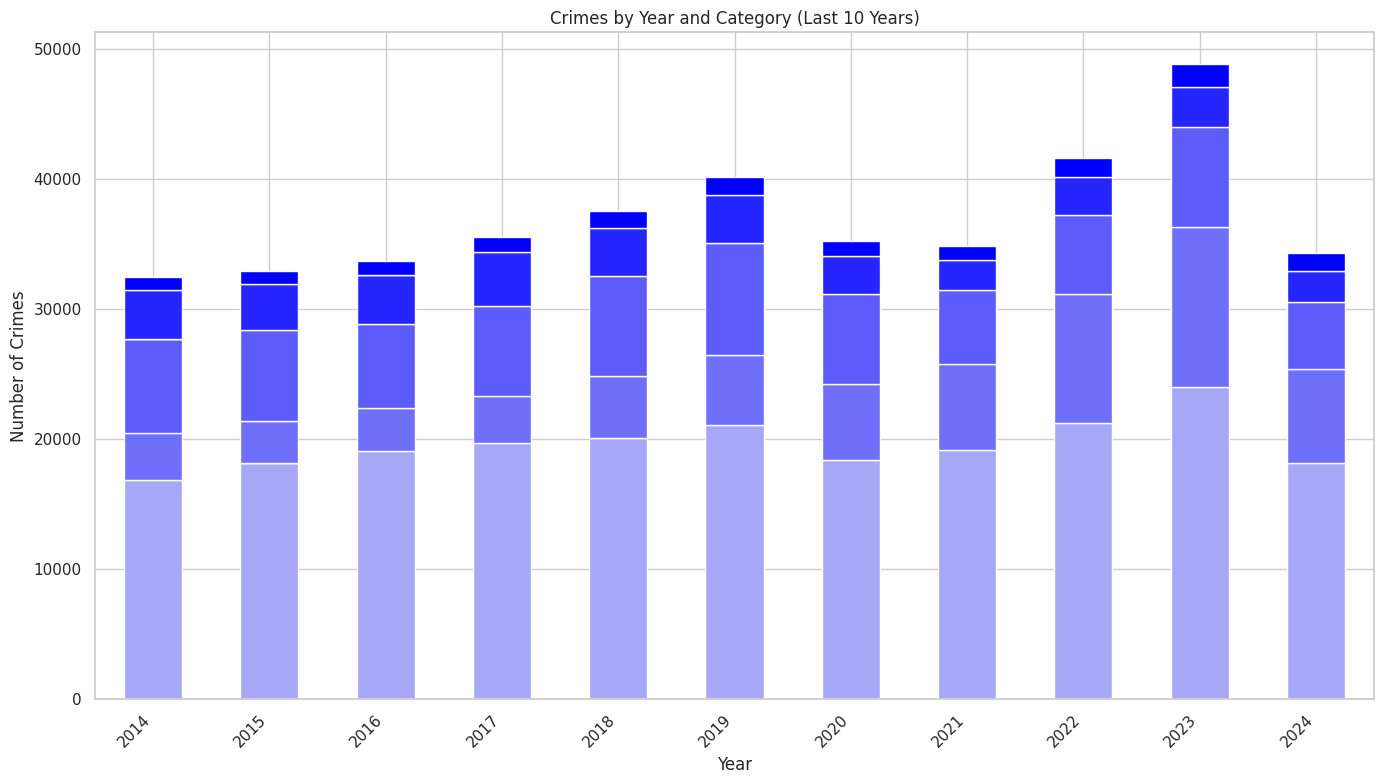

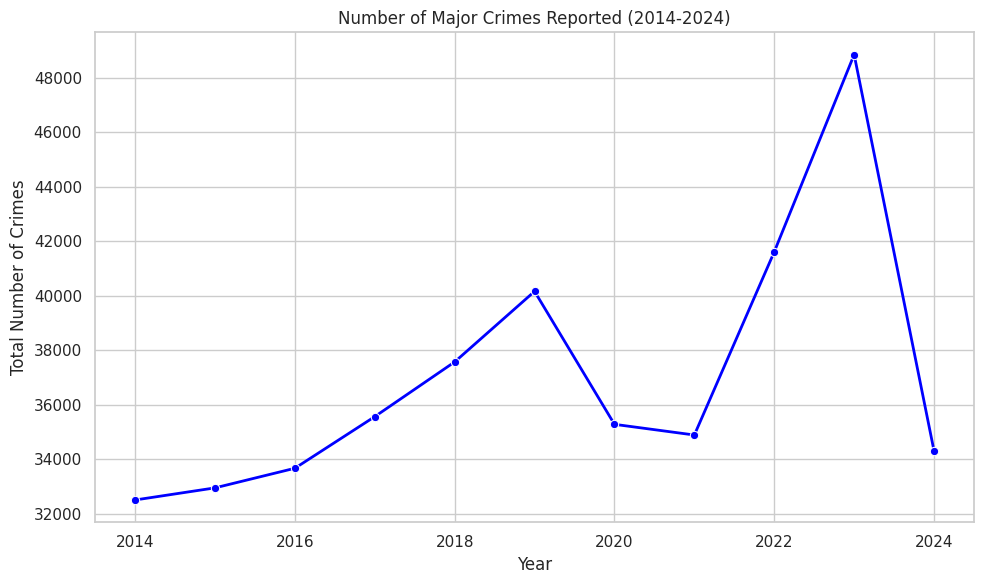

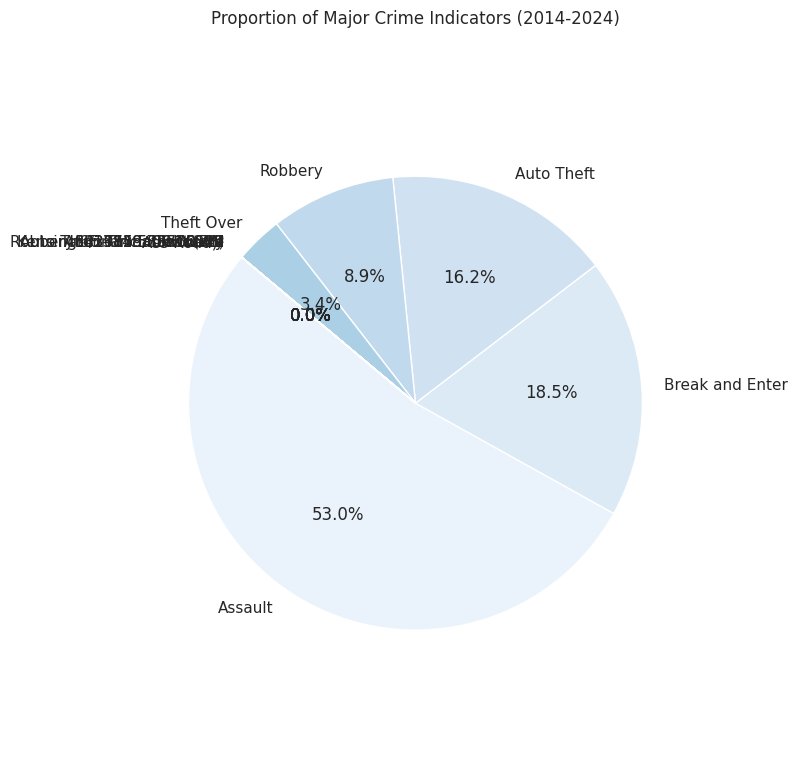

<ipython-input-103-fa200d323056>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="crime_count", y="OFFENCE", data=crime_proportions_pd, palette="Blues_d")


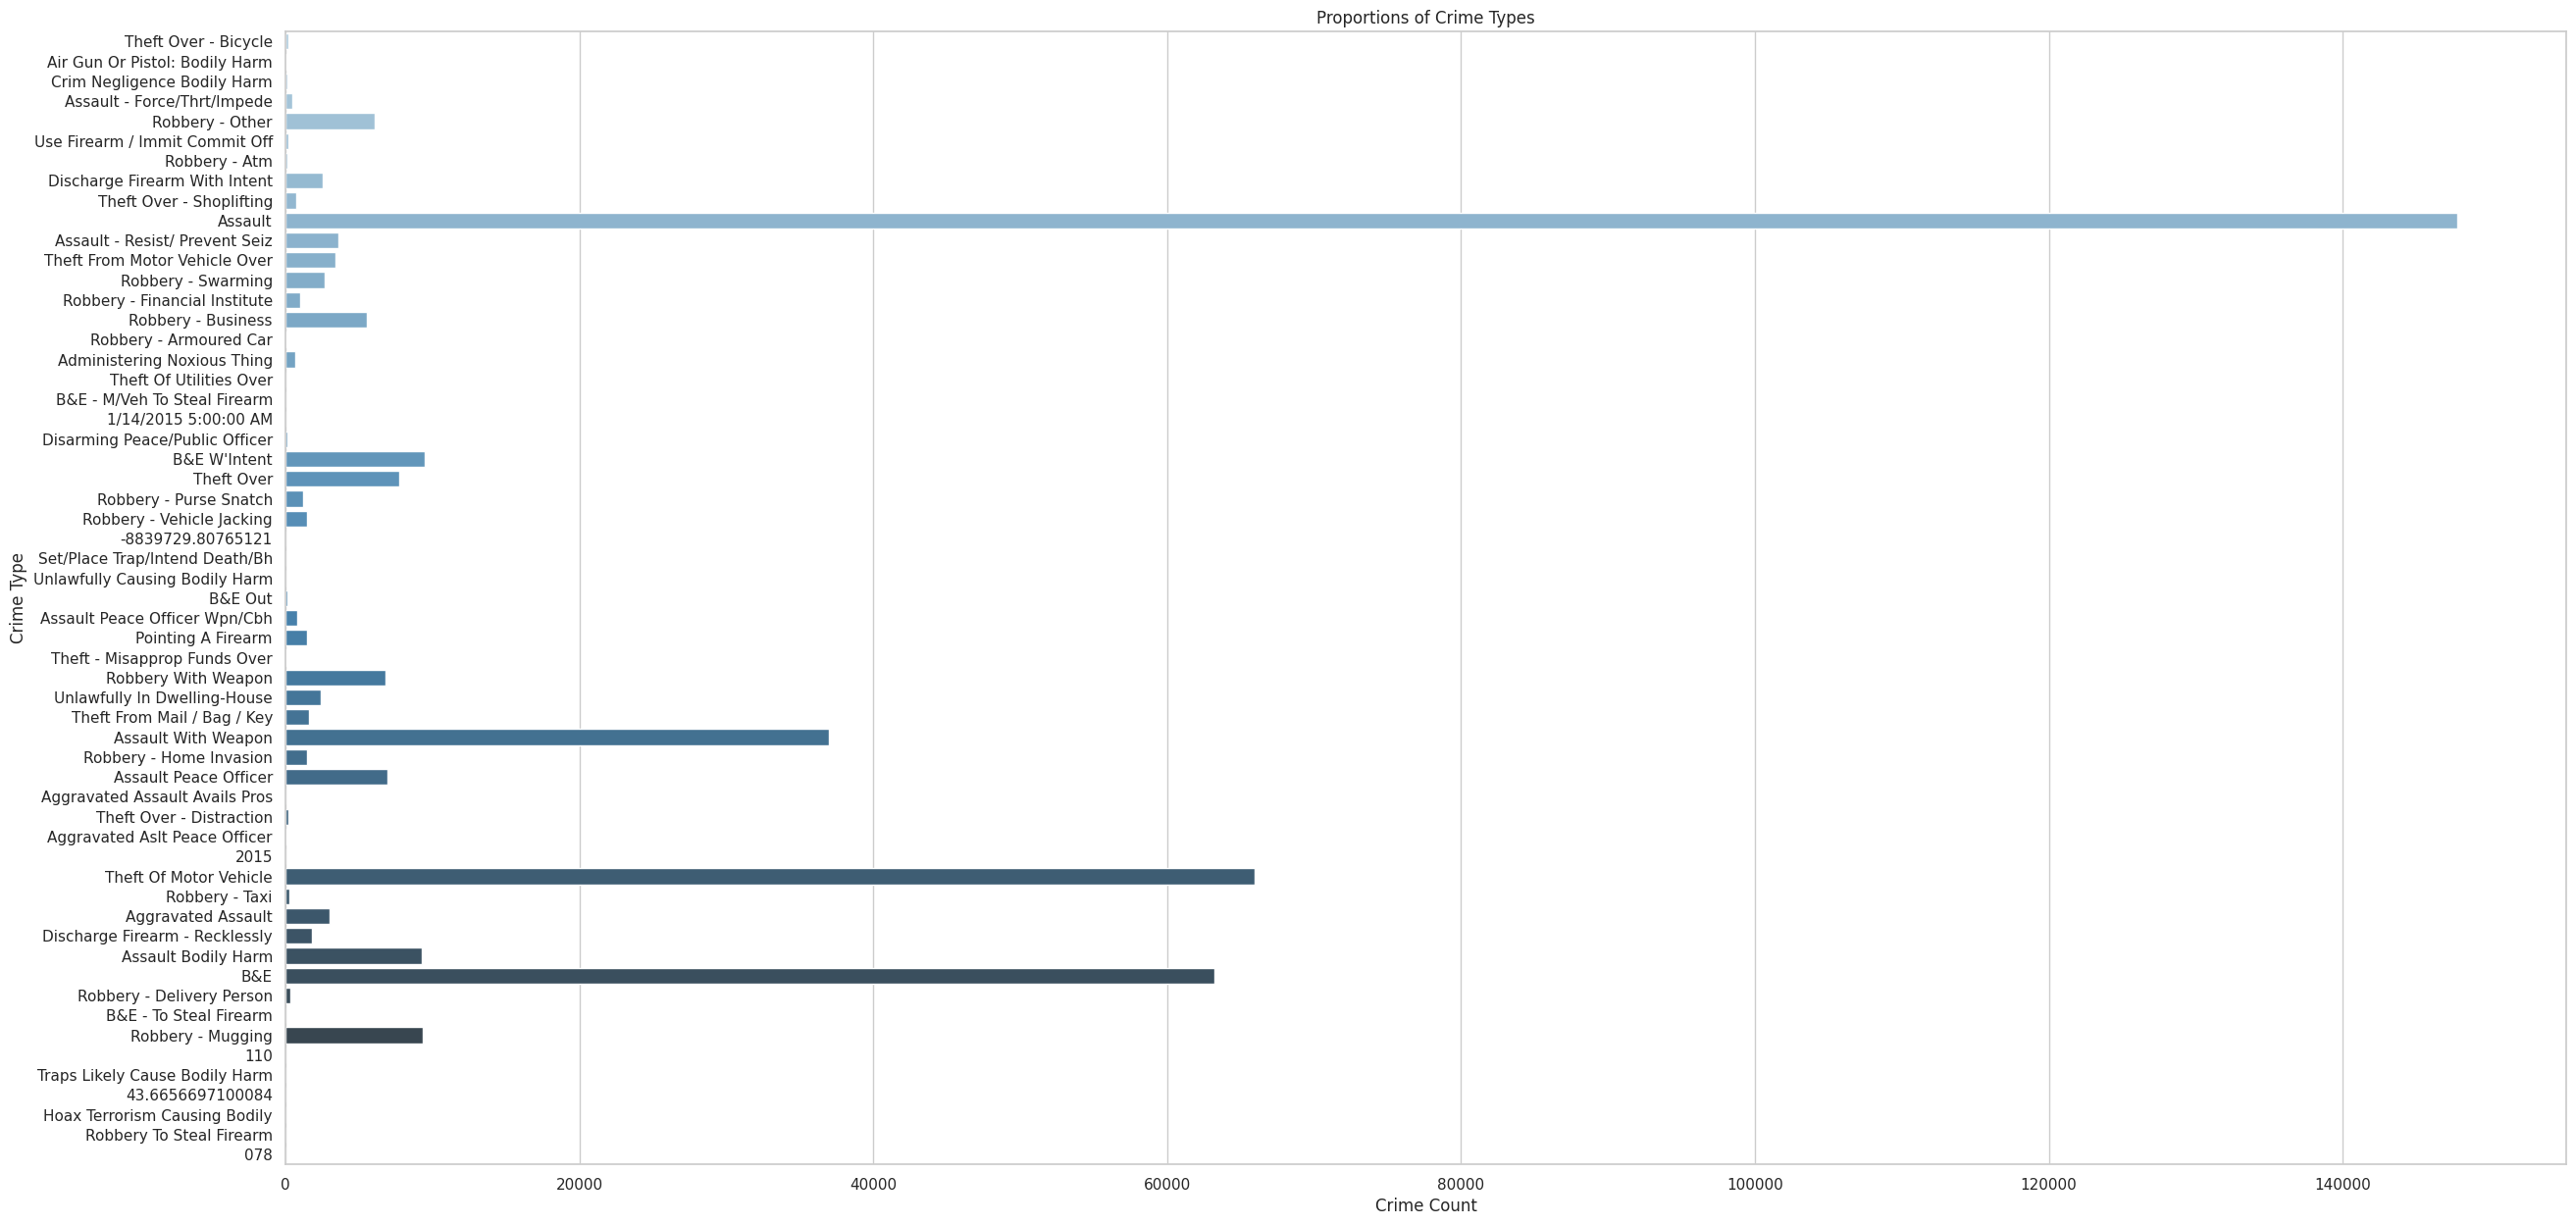

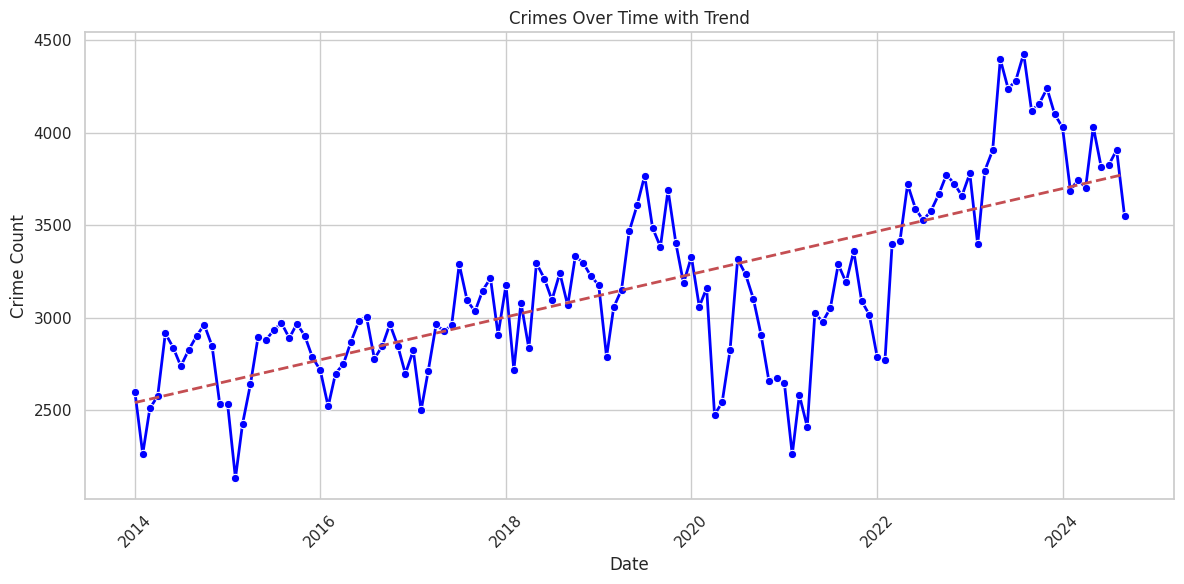

In [103]:
# prompt: reorder them

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col, lit, year, concat, to_date
import pyspark.sql.functions as F

# Initialize SparkSession
spark = SparkSession.builder.appName("CrimeDataAnalysis").getOrCreate()

# Load data (replace with your file path)
file_name = "Major_Crime_Indicators_Open_Data_-3805566126367379926.csv"
df = spark.read.csv(f'/content/{file_name}', header=True, inferSchema=True)

# Data cleaning (remove duplicates)
df_cleaned = df.dropDuplicates()

# Filter for last 10 years
current_year = 2024  # Replace with dynamic year if needed
df_last_10_years = df_cleaned.filter(
    (col("OCC_YEAR") >= current_year - 10) & (col("OCC_YEAR") <= current_year)
).withColumn("OCC_YEAR", col("OCC_YEAR").cast("int")) # Cast OCC_YEAR to integer

# Convert to pandas for some plots
pandas_df_last_10_years = df_last_10_years.toPandas()

# --- Plotting starts here ---

# 1. Stacked Bar Chart (Crimes by Year and Category)
df_pivoted = pandas_df_last_10_years.pivot_table(index='OCC_YEAR', columns='MCI_CATEGORY', values='OBJECTID', aggfunc='count', fill_value=0) # Changed values='count' to values='OBJECTID' and aggfunc='count'
colors = sns.light_palette("blue", n_colors=df_pivoted.shape[1])
ax = df_pivoted.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8))
ax.legend().set_visible(False)
plt.title('Crimes by Year and Category (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2. Total Crimes per Year (Line Plot)
total_crimes_per_year = pandas_df_last_10_years.groupby('OCC_YEAR')['OBJECTID'].count().reset_index().rename(columns={'OBJECTID': 'count'}) # Group by 'OCC_YEAR' and count 'OBJECTID', then rename 'OBJECTID' to 'count'
total_crimes_per_year = total_crimes_per_year.sort_values(by='OCC_YEAR', ascending=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_crimes_per_year, x='OCC_YEAR', y='count', marker='o', color='blue', linewidth=2)
plt.title('Number of Major Crimes Reported (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.tight_layout()
plt.show()

# 4. Crime Frequency by Hour of Day (Heatmap) - Requires 'occurrencedate' column
if 'occurrencedate' in pandas_df_last_10_years.columns:
    pandas_df_last_10_years['occurrencedate'] = pd.to_datetime(pandas_df_last_10_years['occurrencedate'])
    pandas_df_last_10_years['OCC_HOUR'] = pandas_df_last_10_years['occurrencedate'].dt.hour
    crime_by_hour = pandas_df_last_10_years.groupby(['OCC_YEAR', 'OCC_HOUR']).size().unstack(fill_value=0)
    plt.figure(figsize=(12, 8))
    sns.heatmap(crime_by_hour, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
    plt.title('Crime Frequency by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Year')
    plt.show()


# 5. Crime Proportions by Offence (Bar Chart)
crime_proportions = df_last_10_years.groupBy("OFFENCE").agg(count("OBJECTID").alias("crime_count"))
crime_proportions_pd = crime_proportions.toPandas()
plt.figure(figsize=(30, 15))
sns.barplot(x="crime_count", y="OFFENCE", data=crime_proportions_pd, palette="Blues_d")
plt.xlabel('Crime Count')
plt.ylabel('Crime Type')
plt.title('Proportions of Crime Types')
plt.show()


#6. Crimes over Time (Line Plot with Trendline)
crime_by_month = df_last_10_years.groupBy("OCC_YEAR", "OCC_MONTH").agg(count("OBJECTID").alias("crime_count"))
crime_by_month_pd = crime_by_month.toPandas()

# Data type handling and date creation (similar to the original code)
crime_by_month_pd['OCC_YEAR'] = pd.to_numeric(crime_by_month_pd['OCC_YEAR'], errors='coerce').astype(int)
crime_by_month_pd['OCC_MONTH'] = crime_by_month_pd['OCC_MONTH'].astype(str)
month_map = {  # Mapping month names to numbers
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09', 'October': '10', 'November': '11', 'December': '12'
}
crime_by_month_pd['OCC_MONTH'] = crime_by_month_pd['OCC_MONTH'].map(month_map)
crime_by_month_pd['Date'] = pd.to_datetime(crime_by_month_pd['OCC_YEAR'].astype(str) + '-' + crime_by_month_pd['OCC_MONTH'], format='%Y-%m')
crime_by_month_pd = crime_by_month_pd.sort_values('Date')

plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_by_month_pd, x='Date', y='crime_count', marker='o', color='blue', linewidth=2)


x = crime_by_month_pd['Date'].astype(np.int64) // 10**9
y = crime_by_month_pd['crime_count']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(crime_by_month_pd['Date'], p(x), "r--", linewidth=2)

plt.title('Crimes Over Time with Trend')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [212]:

df_last_10_years = df_last_10_years.withColumn(
    "Date",
    F.to_date(F.concat(F.col("OCC_YEAR").cast("string"), F.lit("-"), F.col("OCC_MONTH").cast("string")), "yyyy-MM")
)


crime_month_offence = df_last_10_years.groupBy("Date", "OFFENCE").agg(
    F.count("OBJECTID").alias("crime_count")
)
crime_month_offence = crime_month_offence.orderBy("Date", "OFFENCE")

crime_month_offence.show()

crime_month_offence_pd = crime_month_offence.toPandas()



+----+--------------------+-----------+
|Date|             OFFENCE|crime_count|
+----+--------------------+-----------+
|NULL|                NULL|          2|
|NULL|   -8839729.80765121|          1|
|NULL|                 078|          1|
|NULL|1/14/2015 5:00:00 AM|          1|
|NULL|                 110|          1|
|NULL|                2015|          1|
|NULL|    43.6656697100084|          1|
|NULL|Administering Nox...|        682|
|NULL|Aggravated Aslt P...|         31|
|NULL|  Aggravated Assault|       3003|
|NULL|Aggravated Assaul...|         19|
|NULL|Air Gun Or Pistol...|         32|
|NULL|             Assault|     147829|
|NULL|Assault - Force/T...|        455|
|NULL|Assault - Resist/...|       3617|
|NULL| Assault Bodily Harm|       9280|
|NULL|Assault Peace Off...|       6913|
|NULL|Assault Peace Off...|        810|
|NULL| Assault With Weapon|      36996|
|NULL|                 B&E|      63217|
+----+--------------------+-----------+
only showing top 20 rows



In [119]:

top_5_crimes = crime_proportions_pd.sort_values(by='crime_count', ascending=False).head(5)
top_5_crimes

,OFFENCE,crime_count
9,Assault,147829
42,Theft Of Motor Vehicle,65981
47,B&E,63217
35,Assault With Weapon,36996
21,B&E W'Intent,9472


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
<ipython-input-114-171cd4d19647>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crime_count', y='OFFENCE', data=top_5_crimes, palette='Blues_d')


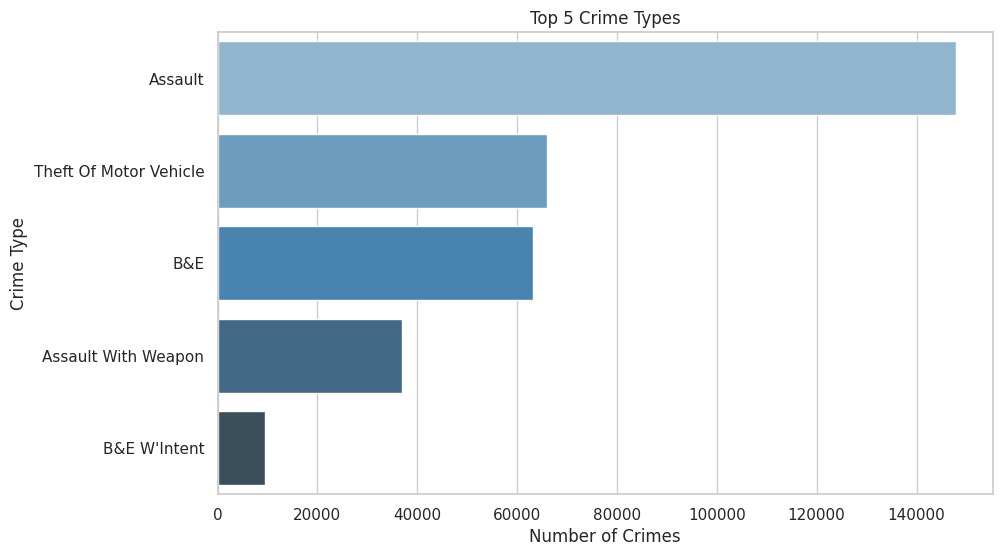

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='crime_count', y='OFFENCE', data=top_5_crimes, palette='Blues_d')
plt.title('Top 5 Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()

In [122]:
import pyspark.sql.functions as F

crime_hourly = df_last_10_years.groupBy(
    'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_HOUR'
).agg(F.count('OBJECTID').alias('crime_count'))

crime_hourly = crime_hourly.withColumn(
    'Timestamp',
    F.concat_ws(
        ' ',
        F.concat(
            F.col('OCC_YEAR').cast('string'),
            F.lit('-'),
            F.lpad(F.col('OCC_MONTH').cast('string'), 2, '0'),
            F.lit('-'),
            F.lpad(F.col('OCC_DAY').cast('string'), 2, '0')
        ),
        F.concat(F.lpad(F.col('OCC_HOUR').cast('string'), 2, '0'), F.lit(':00:00'))
    )
).withColumn('Timestamp', F.to_timestamp(F.col('Timestamp'), 'yyyy-MM-dd HH:mm:ss'))

crime_hourly = crime_hourly.orderBy('Timestamp')
crime_hourly.show(10)


+--------+---------+-------+--------+-----------+---------+
|OCC_YEAR|OCC_MONTH|OCC_DAY|OCC_HOUR|crime_count|Timestamp|
+--------+---------+-------+--------+-----------+---------+
|    2018|      May|     13|      18|          5|     NULL|
|    2015|     June|      6|      15|          9|     NULL|
|    2018|      May|     16|       3|          2|     NULL|
|    2016| February|      9|      12|          4|     NULL|
|    2018|September|      7|      12|          6|     NULL|
|    2016|     June|     16|      16|          7|     NULL|
|    2014|      May|     14|       9|          5|     NULL|
|    2017|  October|      6|      21|         11|     NULL|
|    2015|    April|     25|      23|          6|     NULL|
|    2018|September|      7|       2|          5|     NULL|
+--------+---------+-------+--------+-----------+---------+
only showing top 10 rows



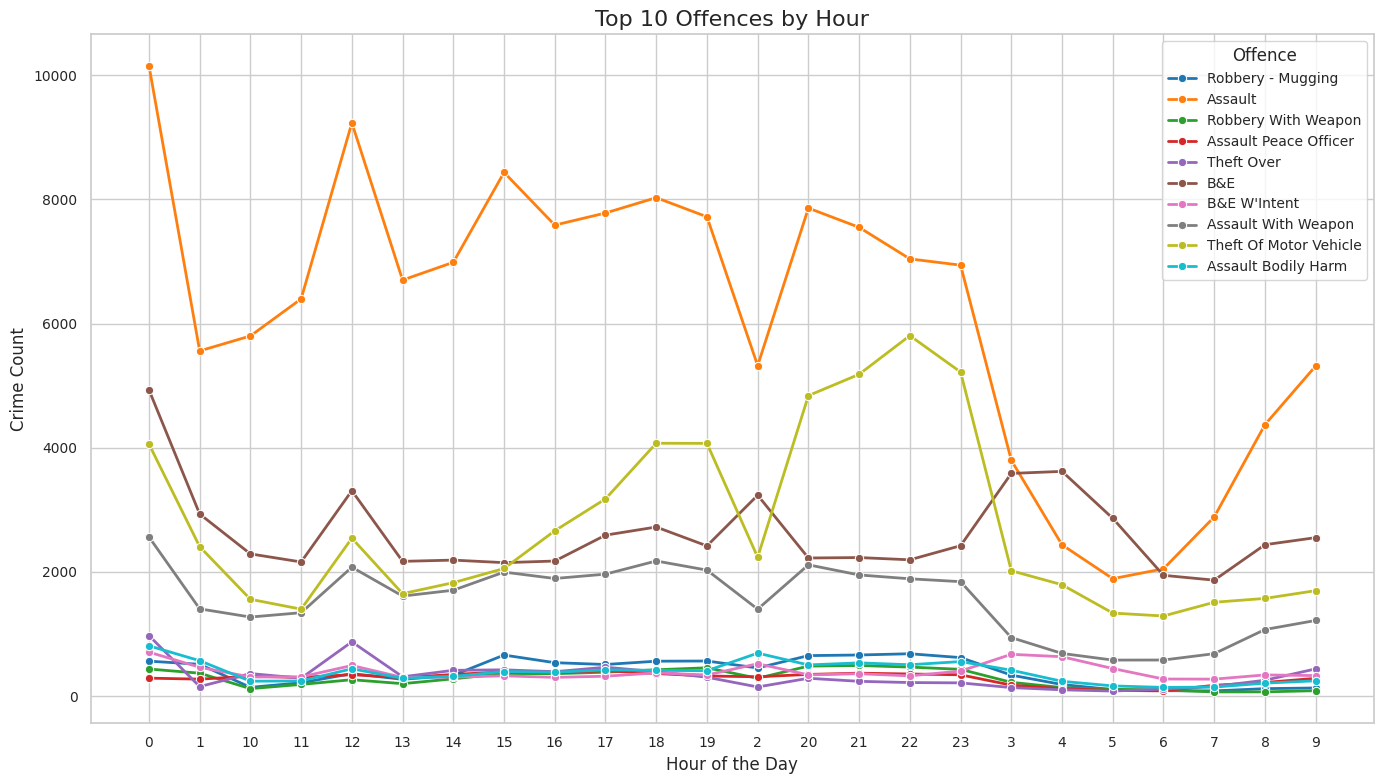

In [133]:
top_offences = (
    df_last_10_years.groupBy("OFFENCE")
    .agg(F.count("OBJECTID").alias("crime_count"))
    .orderBy(F.desc("crime_count"))
    .limit(10)
)


top_offences_list = [row["OFFENCE"] for row in top_offences.collect()]

filtered_df = df_last_10_years.filter(F.col("OFFENCE").isin(top_offences_list))

crime_by_hour = (
    filtered_df.groupBy("OFFENCE", "OCC_HOUR")
    .agg(F.count("OBJECTID").alias("crime_count"))
    .orderBy("OCC_HOUR")
)

crime_by_hour_pd = crime_by_hour.toPandas()

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=crime_by_hour_pd,
    x="OCC_HOUR",
    y="crime_count",
    hue="OFFENCE",
    marker="o",
    linewidth=2,
    palette="tab10"
)
plt.title("Top 10 Offences by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Offence", fontsize=10, title_fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [126]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

crime_by_month = df_last_10_years.groupBy("OCC_MONTH").agg(
    F.count("OBJECTID").alias("crime_count")
)


crime_by_month = crime_by_month.withColumn("OCC_MONTH", F.col("OCC_MONTH").cast("int"))

crime_by_month = crime_by_month.orderBy("OCC_MONTH")

crime_by_month_pd = crime_by_month.toPandas()

month_map = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
crime_by_month_pd["Month"] = crime_by_month_pd["OCC_MONTH"].map(month_map)
crime_by_month_pd = crime_by_month_pd.sort_values("OCC_MONTH")


In [165]:
import pyspark.sql.functions as F


crime_by_month = df_last_10_years.groupBy("REPORT_MONTH").agg(
    F.count("OBJECTID").alias("crime_count")
)


crime_by_month = crime_by_month.withColumn("Month", month_map_expr[F.col("REPORT_MONTH")])

crime_by_month = crime_by_month.orderBy("REPORT_MONTH")

crime_by_month_pd = crime_by_month.toPandas()

crime_by_month.show()

+------------+-----------+-----+
|REPORT_MONTH|crime_count|Month|
+------------+-----------+-----+
|       April|      32985| NULL|
|      August|      37154| NULL|
|    December|      30439| NULL|
|    February|      30159| NULL|
|     January|      32534| NULL|
|        July|      36940| NULL|
|        June|      35537| NULL|
|       March|      33499| NULL|
|         May|      36248| NULL|
|    November|      32494| NULL|
|     October|      33235| NULL|
|   September|      36079| NULL|
+------------+-----------+-----+



<ipython-input-211-5e273d8132b8>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='crime_count', data=crime_by_month_pd, palette='Reds')


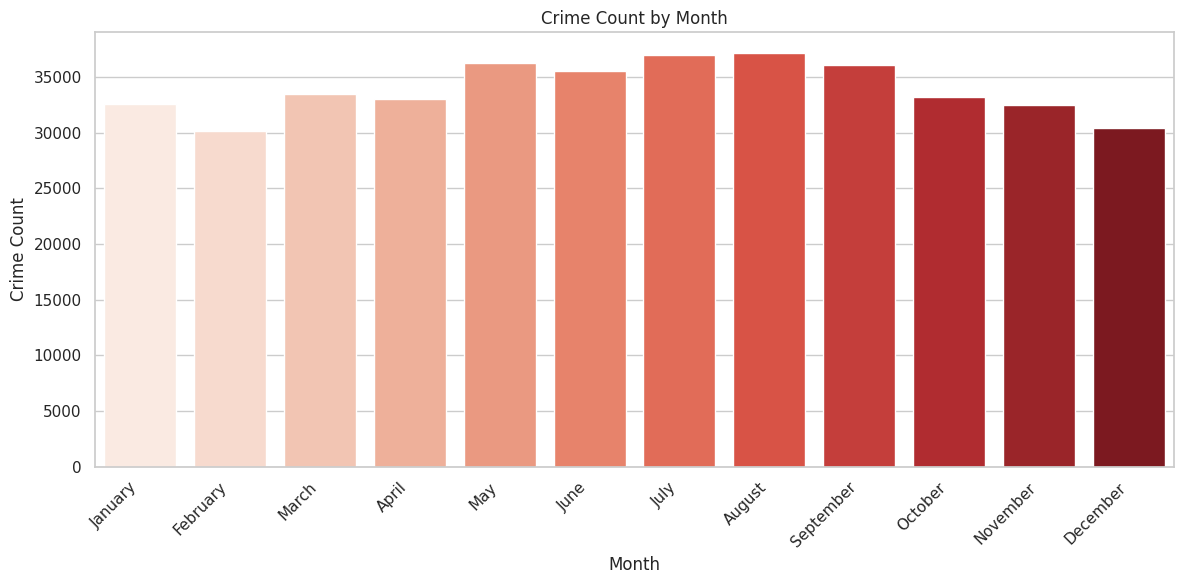

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'Month' in crime_by_month_pd.columns:
    crime_by_month_pd = crime_by_month_pd.drop(columns=['Month'])


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


crime_by_month_pd['Month'] = pd.Categorical(crime_by_month_pd['REPORT_MONTH'], categories=month_order, ordered=True)
crime_by_month_pd = crime_by_month_pd.sort_values('Month')


plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='crime_count', data=crime_by_month_pd, palette='Reds')
plt.title('Crime Count by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [125]:
# Fill in missing hours with 0 counts for each offence (important for smooth animation)
all_hours = pd.DataFrame({"OCC_HOUR": range(24)})
expanded_df = pd.DataFrame()

for offence in top_offences_list:
    temp_df = crime_by_hour_pd[crime_by_hour_pd["OFFENCE"] == offence]

    # Ensure 'OCC_HOUR' in both DataFrames has the same data type
    all_hours['OCC_HOUR'] = all_hours['OCC_HOUR'].astype(int) # Convert 'OCC_HOUR' in all_hours to int
    temp_df['OCC_HOUR'] = temp_df['OCC_HOUR'].astype(int) # Convert 'OCC_HOUR' in temp_df to int

    temp_df = all_hours.merge(temp_df, on="OCC_HOUR", how="left")
    temp_df["OFFENCE"] = offence
    temp_df["crime_count"] = temp_df["crime_count"].fillna(0)
    expanded_df = pd.concat([expanded_df, temp_df], ignore_index=True)

<ipython-input-125-5a32b4f2cc7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['OCC_HOUR'] = temp_df['OCC_HOUR'].astype(int) # Convert 'OCC_HOUR' in temp_df to int
<ipython-input-125-5a32b4f2cc7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['OCC_HOUR'] = temp_df['OCC_HOUR'].astype(int) # Convert 'OCC_HOUR' in temp_df to int
<ipython-input-125-5a32b4f2cc7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

<ipython-input-210-ec7c987531b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['OCC_HOUR'] = temp_df['OCC_HOUR'].astype(int)
<ipython-input-210-ec7c987531b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['OCC_HOUR'] = temp_df['OCC_HOUR'].astype(int)


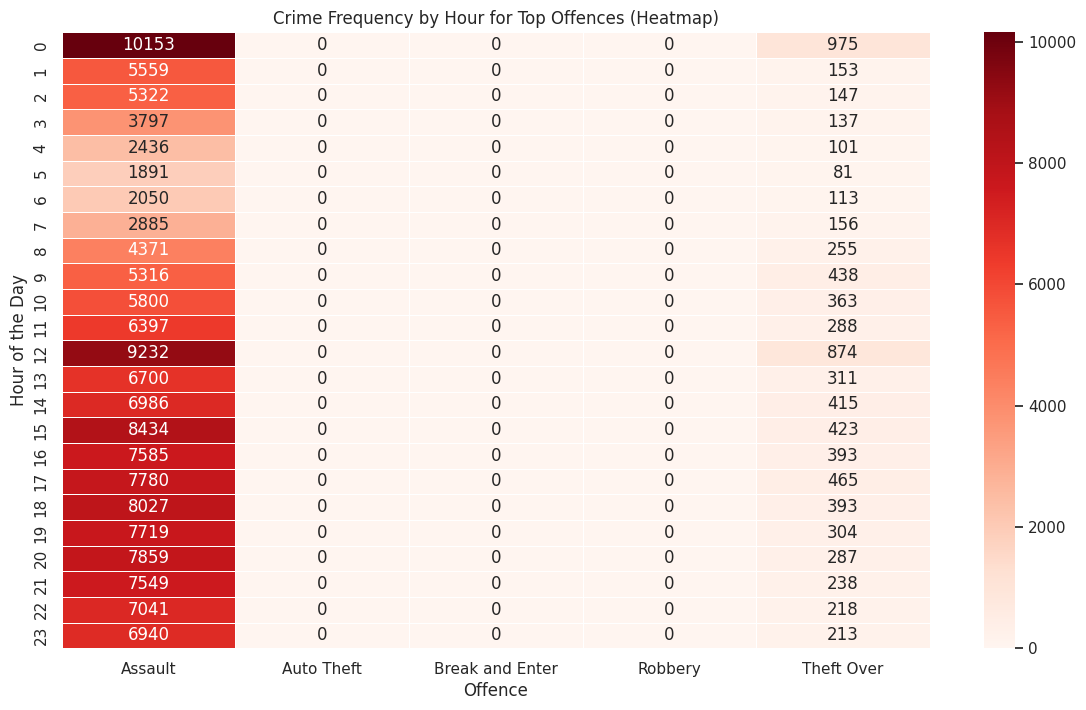

In [210]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
all_hours = pd.DataFrame({"OCC_HOUR": range(24)})
expanded_df = pd.DataFrame()

for offence in top_offences_list:
    temp_df = crime_by_hour_pd[crime_by_hour_pd["OFFENCE"] == offence]


    all_hours['OCC_HOUR'] = all_hours['OCC_HOUR'].astype(int)
    temp_df['OCC_HOUR'] = temp_df['OCC_HOUR'].astype(int)

    temp_df = all_hours.merge(temp_df, on="OCC_HOUR", how="left")
    temp_df["OFFENCE"] = offence
    temp_df["crime_count"] = temp_df["crime_count"].fillna(0)
    expanded_df = pd.concat([expanded_df, temp_df], ignore_index=True)

plt.figure(figsize=(14, 8))
heatmap_data = expanded_df.pivot(index="OCC_HOUR", columns="OFFENCE", values="crime_count")
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".0f", linewidths=.5)
plt.title("Crime Frequency by Hour for Top Offences (Heatmap)")
plt.xlabel("Offence")
plt.ylabel("Hour of the Day")
plt.show()

In [155]:


import pandas as pd


top_5_crimes = crime_proportions_pd.sort_values(by='crime_count', ascending=False).head(5)


top_5_crimes

,OFFENCE,crime_count
9,Assault,147829
42,Theft Of Motor Vehicle,65981
47,B&E,63217
35,Assault With Weapon,36996
21,B&E W'Intent,9472


In [158]:
from pyspark.sql import functions as F

assault = df_last_10_years.filter(F.col('MCI_CATEGORY') == 'Assault'

b_e = df_last_10_years.filter(F.col('MCI_CATEGORY') == 'Break and Enter')

auto_theft = df_last_10_years.filter(F.col('MCI_CATEGORY') == 'Auto Theft')

robbery = df_last_10_years.filter(F.col('MCI_CATEGORY') == 'Robbery')

theft_over = df_last_10_years.filter(F.col('MCI_CATEGORY') == 'Theft Over')

In [159]:
assault.show()
b_e.show()
auto_theft.show()
robbery.show()
theft_over.show()

+--------+---------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---------+-------+-------+-------+--------+--------+--------------------+-------------+--------+-------+--------------------+------------+--------+--------------------+--------+--------------------+-----------------+----------------+-----------------+----------------+----+
|OBJECTID|EVENT_UNIQUE_ID|         REPORT_DATE|            OCC_DATE|REPORT_YEAR|REPORT_MONTH|REPORT_DAY|REPORT_DOY|REPORT_DOW|REPORT_HOUR|OCC_YEAR|OCC_MONTH|OCC_DAY|OCC_DOY|OCC_DOW|OCC_HOUR|DIVISION|       LOCATION_TYPE|PREMISES_TYPE|UCR_CODE|UCR_EXT|             OFFENCE|MCI_CATEGORY|HOOD_158|   NEIGHBOURHOOD_158|HOOD_140|   NEIGHBOURHOOD_140|       LONG_WGS84|       LAT_WGS84|                x|               y|Date|
+--------+---------------+--------------------+--------------------+-----------+------------+----------+----------+----------+-----------+--------+---------+-

In [180]:
from itertools import chain
weekday_map = {
    1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday",
    5: "Thursday", 6: "Friday", 7: "Saturday"
}

weekday_map_expr = F.create_map([F.lit(x) for x in chain(*weekday_map.items())])

crime_by_weekday = df_last_10_years.groupBy("REPORT_DOW").agg(
    F.count("OBJECTID").alias("crime_count")
)

crime_by_weekday = crime_by_weekday.withColumn(
    "Weekdays", weekday_map_expr[F.col("REPORT_DOW")]
)

crime_by_weekday = crime_by_weekday.orderBy("REPORT_DOW")

crime_by_weekday.show()

crime_by_weekday_pd = crime_by_weekday.toPandas()

+----------+-----------+--------+
|REPORT_DOW|crime_count|Weekdays|
+----------+-----------+--------+
|Friday    |      59738|    NULL|
|Monday    |      60362|    NULL|
|Saturday  |      56109|    NULL|
|Sunday    |      55044|    NULL|
|Thursday  |      58336|    NULL|
|Tuesday   |      58909|    NULL|
|Wednesday |      58805|    NULL|
+----------+-----------+--------+



In [174]:
from itertools import chain
weekday_map = {
    1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday",
    5: "Thursday", 6: "Friday", 7: "Saturday"
}
weekday_map_expr = F.create_map([F.lit(x) for x in chain(*weekday_map.items())])

crime_by_weekday = df_last_10_years.groupBy("REPORT_DOW").agg(
    F.count("OBJECTID").alias("crime_count")
)
crime_by_weekday = crime_by_weekday.withColumn(
    "Weekdays", weekday_map_expr[F.col("REPORT_DOW")]
)
crime_by_weekday = crime_by_weekday.orderBy("REPORT_DOW")
crime_by_weekday.show()
crime_by_weekday_pd = crime_by_weekday.toPandas()

+----------+-----------+--------+
|REPORT_DOW|crime_count|Weekdays|
+----------+-----------+--------+
|Friday    |      59738|    NULL|
|Monday    |      60362|    NULL|
|Saturday  |      56109|    NULL|
|Sunday    |      55044|    NULL|
|Thursday  |      58336|    NULL|
|Tuesday   |      58909|    NULL|
|Wednesday |      58805|    NULL|
+----------+-----------+--------+



In [187]:
import pandas as pd
data = {'REPORT_DOW': ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
        'crime_count': [59738, 60362, 56109, 55044, 58336, 58909, 58805],
        'Weekdays': [None] * 7}
df = pd.DataFrame(data)


df = df.drop('Weekdays', axis=1)


df['REPORT_HOUR'] = 0


df

,REPORT_DOW,crime_count,REPORT_HOUR
0,Friday,59738,0
1,Monday,60362,0
2,Saturday,56109,0
3,Sunday,55044,0
4,Thursday,58336,0
5,Tuesday,58909,0
6,Wednesday,58805,0


In [208]:

weekday_map = {
    1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday",
    5: "Thursday", 6: "Friday", 7: "Saturday"
}
weekday_map_expr = F.create_map([F.lit(x) for x in chain(*weekday_map.items())])
crime_by_weekday_hour = df_last_10_years.groupBy("REPORT_DOW", "REPORT_HOUR").agg(
    F.count("OBJECTID").alias("crime_count")
)
crime_by_weekday_hour = crime_by_weekday_hour.withColumn(
    "Weekdays", weekday_map_expr[F.col("REPORT_DOW")]
)
crime_by_weekday_hour = crime_by_weekday_hour.orderBy("REPORT_DOW", "REPORT_HOUR")
crime_by_weekday_hour.show()
crime_by_weekday_hour_pd = crime_by_weekday_hour.toPandas()

+----------+-----------+-----------+--------+
|REPORT_DOW|REPORT_HOUR|crime_count|Weekdays|
+----------+-----------+-----------+--------+
|Friday    |          0|       1794|    NULL|
|Friday    |          1|       1639|    NULL|
|Friday    |         10|       2854|    NULL|
|Friday    |         11|       2847|    NULL|
|Friday    |         12|       3016|    NULL|
|Friday    |         13|       3000|    NULL|
|Friday    |         14|       2935|    NULL|
|Friday    |         15|       3012|    NULL|
|Friday    |         16|       2944|    NULL|
|Friday    |         17|       2871|    NULL|
|Friday    |         18|       3160|    NULL|
|Friday    |         19|       2928|    NULL|
|Friday    |          2|       1482|    NULL|
|Friday    |         20|       2961|    NULL|
|Friday    |         21|       2981|    NULL|
|Friday    |         22|       2720|    NULL|
|Friday    |         23|       2726|    NULL|
|Friday    |          3|       1359|    NULL|
|Friday    |          4|       113

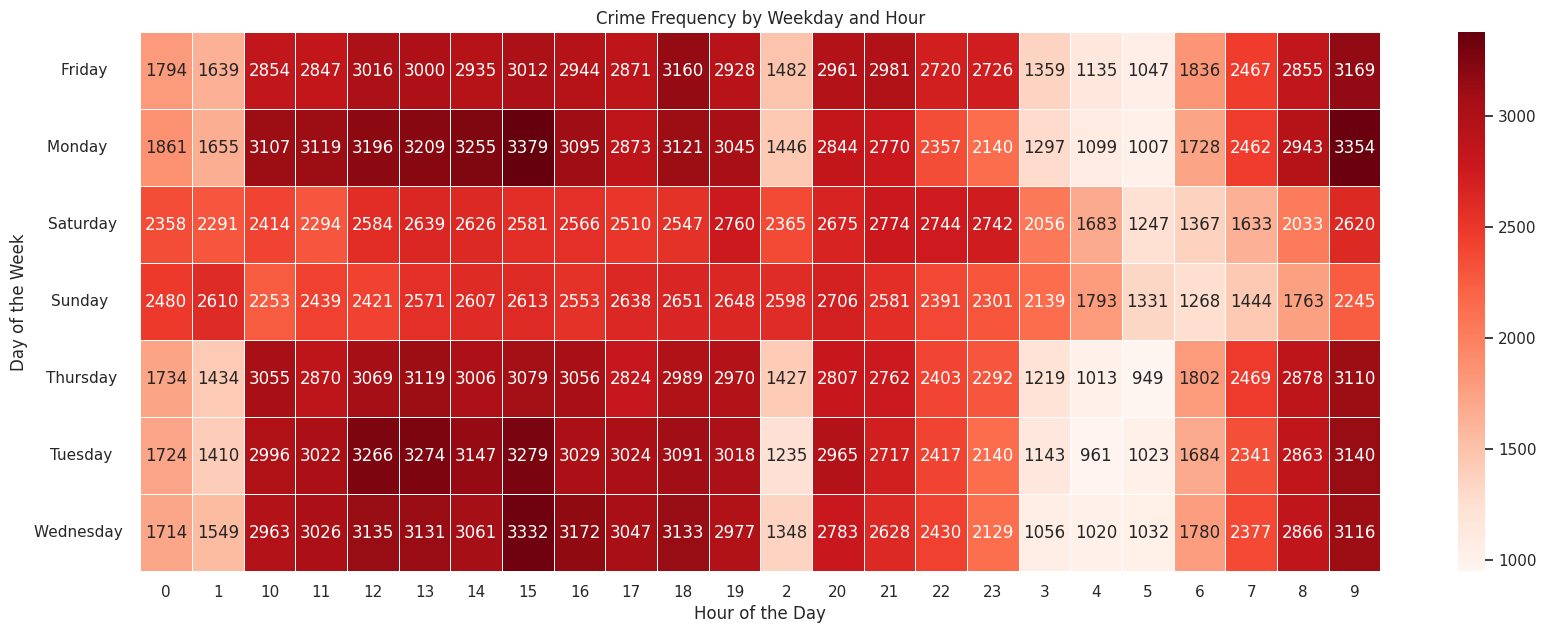

In [207]:

import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = crime_by_weekday_hour_pd.pivot(index='REPORT_DOW', columns='REPORT_HOUR', values='crime_count')

plt.figure(figsize=(20, 7))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".0f", linewidths=.5)
plt.title('Crime Frequency by Weekday and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()